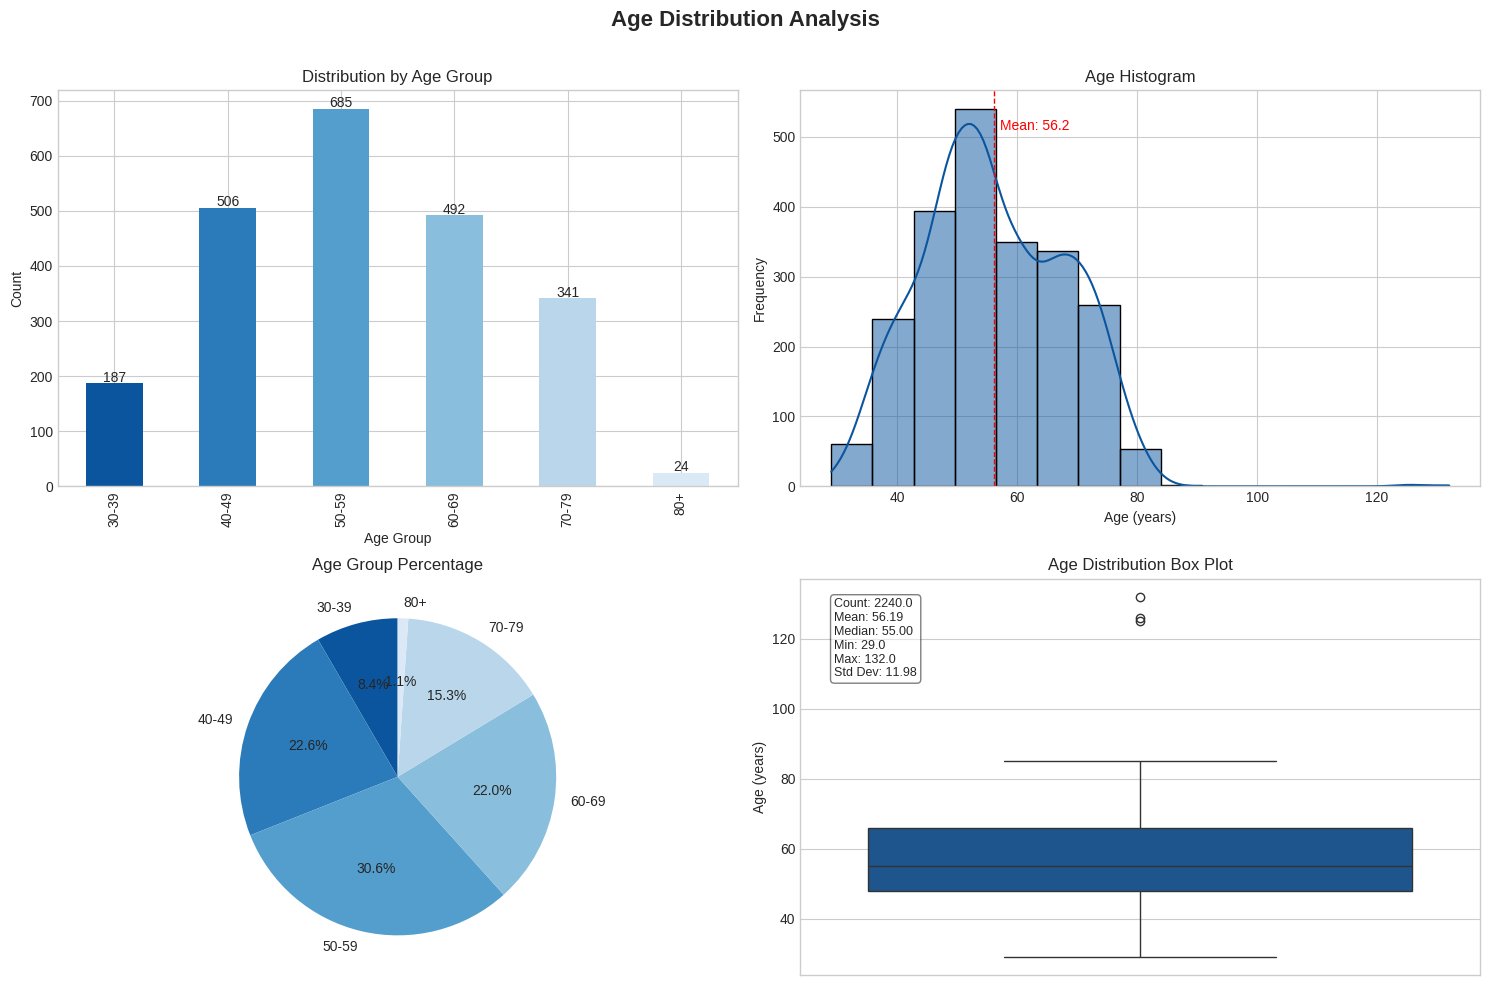

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df = pd.read_excel('marketing_campaign.xlsx')

current_year = 2025
df['Age'] = current_year - df['Year_Birth']
# Age distribution
age_stats = df['Age'].describe()
age_counts = df['Age'].value_counts().sort_index()
age_bins = [30, 40, 50, 60, 70, 80, 90]
age_labels = ['30-39', '40-49', '50-59', '60-69', '70-79', '80+']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
age_group_counts = df['Age_Group'].value_counts().sort_index()

# Set the style for better-looking graphs
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Blues_r")

# Create a figure with multiple subplots
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Age Distribution Analysis', fontsize=16, fontweight='bold')

# 1. Bar chart of age groups
ax1 = plt.subplot(2, 2, 1)
bars = age_group_counts.plot(kind='bar', ax=ax1, color=sns.color_palette("Blues_r", len(age_group_counts)))
ax1.set_title('Distribution by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Count')

# Add count labels on top of each bar
for i, v in enumerate(age_group_counts):
    ax1.text(i, v + 3, str(v), ha='center')

# 2. Histogram of actual ages
ax2 = plt.subplot(2, 2, 2)
sns.histplot(df['Age'], bins=15, kde=True, ax=ax2)
ax2.set_title('Age Histogram')
ax2.set_xlabel('Age (years)')
ax2.set_ylabel('Frequency')

# Add a vertical line for the mean age
ax2.axvline(age_stats['mean'], color='red', linestyle='--', linewidth=1)
ax2.text(age_stats['mean'] + 1, ax2.get_ylim()[1] * 0.9, f'Mean: {age_stats["mean"]:.1f}',
         color='red', fontsize=10)

# 3. Pie chart of age groups
ax3 = plt.subplot(2, 2, 3)
age_group_counts.plot(kind='pie', ax=ax3, autopct='%1.1f%%', startangle=90,
                     colors=sns.color_palette("Blues_r", len(age_group_counts)))
ax3.set_title('Age Group Percentage')
ax3.set_ylabel('')  # Remove the "None" ylabel that appears with pie charts

# 4. Box plot of age distribution
ax4 = plt.subplot(2, 2, 4)
sns.boxplot(y=df['Age'], ax=ax4)
ax4.set_title('Age Distribution Box Plot')
ax4.set_ylabel('Age (years)')

# Add statistics table to the box plot
stats_text = (
    f"Count: {age_stats['count']}\n"
    f"Mean: {age_stats['mean']:.2f}\n"
    f"Median: {age_stats['50%']:.2f}\n"
    f"Min: {age_stats['min']}\n"
    f"Max: {age_stats['max']}\n"
    f"Std Dev: {age_stats['std']:.2f}"
)
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax4.text(0.05, 0.95, stats_text, transform=ax4.transAxes, fontsize=9,
        verticalalignment='top', bbox=props)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Show the plot
plt.savefig('age_distribution_analysis.png', dpi=300)
plt.show()

Missing income values: 24


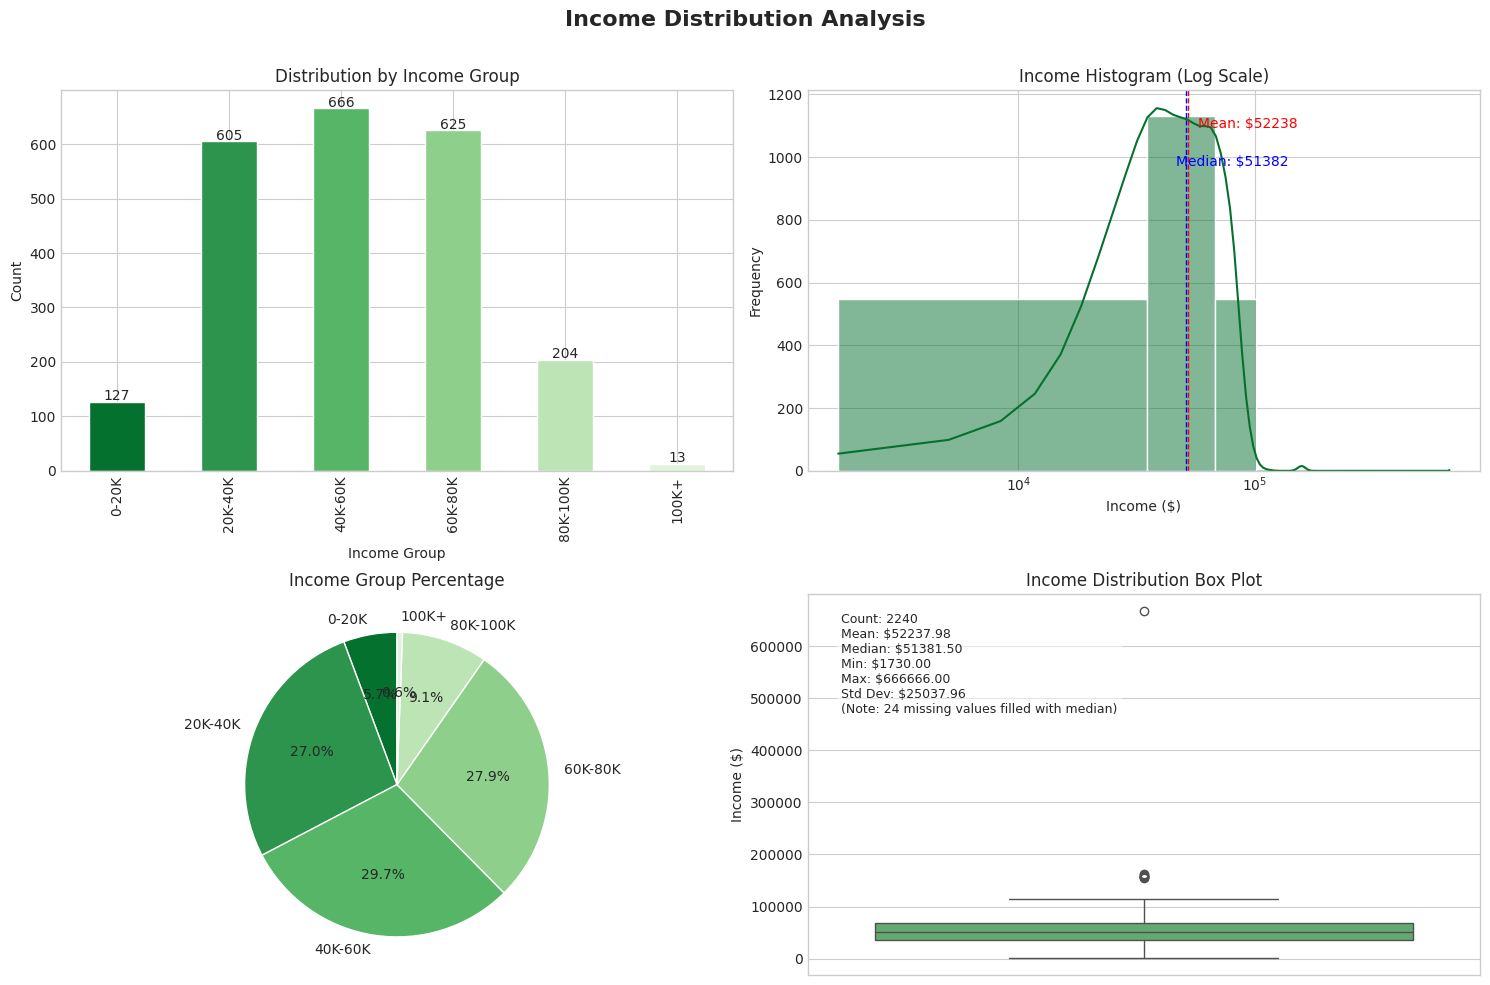

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


# Check missing values
missing_income = df['Income'].isna().sum()
print(f"Missing income values: {missing_income}")

# Fill missing values with median for analysis purposes
income_median = df['Income'].median()
df['Income'] = df['Income'].fillna(income_median)

# Income statistics
income_stats = df['Income'].describe()

# Create income groups - extended to handle higher incomes
income_bins = [0, 20000, 40000, 60000, 80000, 100000, float('inf')]
income_labels = ['0-20K', '20K-40K', '40K-60K', '60K-80K', '80K-100K', '100K+']
df['Income_Group'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels, right=False)
income_group_counts = df['Income_Group'].value_counts().sort_index()

# Set the style for better-looking graphs
# Using a more current approach for styling
sns.set_style("whitegrid")
sns.set_palette("Greens_r")  # Using green palette for income

# Create a figure with multiple subplots
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Income Distribution Analysis', fontsize=16, fontweight='bold')

# 1. Bar chart of income groups
ax1 = plt.subplot(2, 2, 1)
bars = income_group_counts.plot(kind='bar', ax=ax1, color=sns.color_palette("Greens_r", len(income_group_counts)))
ax1.set_title('Distribution by Income Group')
ax1.set_xlabel('Income Group')
ax1.set_ylabel('Count')

# Add count labels on top of each bar
for i, v in enumerate(income_group_counts):
    ax1.text(i, v + 3, str(v), ha='center')

# 2. Histogram of actual incomes
ax2 = plt.subplot(2, 2, 2)
# Use only non-null income values for the histogram
sns.histplot(df['Income'].dropna(), bins=20, kde=True, ax=ax2)
ax2.set_title('Income Histogram')
ax2.set_xlabel('Income ($)')
ax2.set_ylabel('Frequency')
# Optional: Use log scale if income has high variance
if df['Income'].max() / df['Income'].min() > 50:  # Check if range is very wide
    ax2.set_xscale('log')
    ax2.set_title('Income Histogram (Log Scale)')

# Add a vertical line for the mean and median income
ax2.axvline(income_stats['mean'], color='red', linestyle='--', linewidth=1)
ax2.axvline(income_stats['50%'], color='blue', linestyle='--', linewidth=1)
ax2.text(income_stats['mean'] * 1.1, ax2.get_ylim()[1] * 0.9, f'Mean: ${income_stats["mean"]:.0f}',
         color='red', fontsize=10)
ax2.text(income_stats['50%'] * 0.9, ax2.get_ylim()[1] * 0.8, f'Median: ${income_stats["50%"]:.0f}',
         color='blue', fontsize=10)

# 3. Pie chart of income groups
ax3 = plt.subplot(2, 2, 3)
income_group_counts.plot(kind='pie', ax=ax3, autopct='%1.1f%%', startangle=90,
                     colors=sns.color_palette("Greens_r", len(income_group_counts)))
ax3.set_title('Income Group Percentage')
ax3.set_ylabel('')  # Remove the "None" ylabel that appears with pie charts

# 4. Box plot of income distribution - using original income data (with NAs)
ax4 = plt.subplot(2, 2, 4)
sns.boxplot(y=df['Income'].dropna(), ax=ax4, color=sns.color_palette("Greens")[3])
ax4.set_title('Income Distribution Box Plot')
ax4.set_ylabel('Income ($)')

# Add statistics table to the box plot
missing_income_text = f"(Note: {missing_income} missing values filled with median)" if missing_income > 0 else ""
stats_text = (
    f"Count: {income_stats['count']:.0f}\n"
    f"Mean: ${income_stats['mean']:.2f}\n"
    f"Median: ${income_stats['50%']:.2f}\n"
    f"Min: ${income_stats['min']:.2f}\n"
    f"Max: ${income_stats['max']:.2f}\n"
    f"Std Dev: ${income_stats['std']:.2f}\n"
    f"{missing_income_text}"
)
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax4.text(0.05, 0.95, stats_text, transform=ax4.transAxes, fontsize=9,
        verticalalignment='top', bbox=props)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Save and show the plot
plt.savefig('income_distribution_analysis.png', dpi=300)
plt.show()

<ipython-input-14-8620b1bdd3a6>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Education', data=df, order=df['Education'].value_counts().index, palette="Purples_r", ax=ax4)


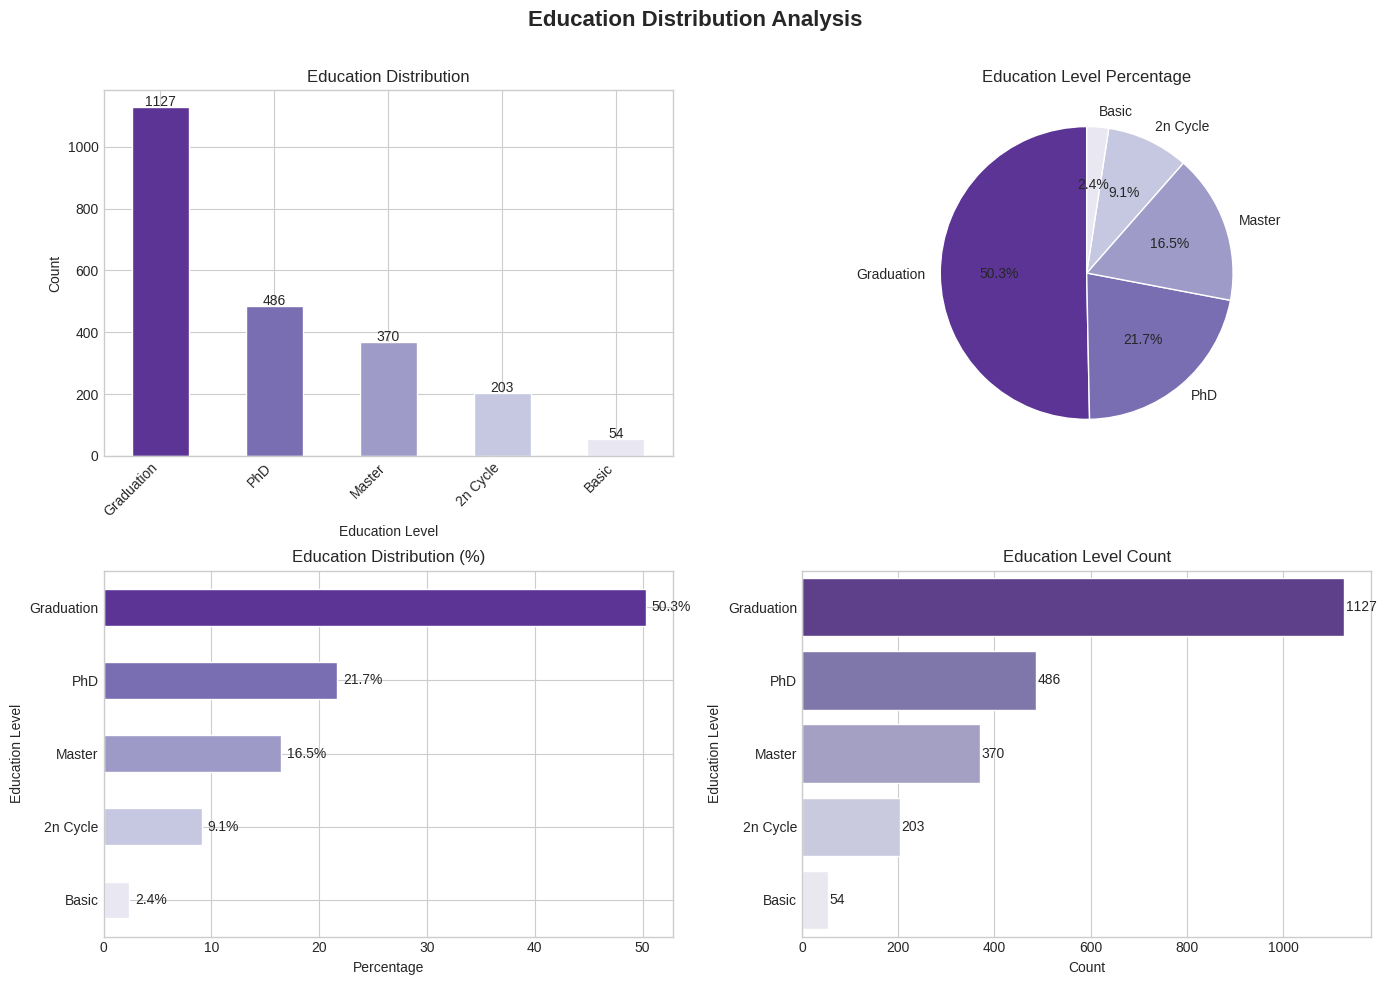

<ipython-input-14-8620b1bdd3a6>:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Marital_Status', data=df, order=df['Marital_Status'].value_counts().index, palette="Oranges_r", ax=ax4)


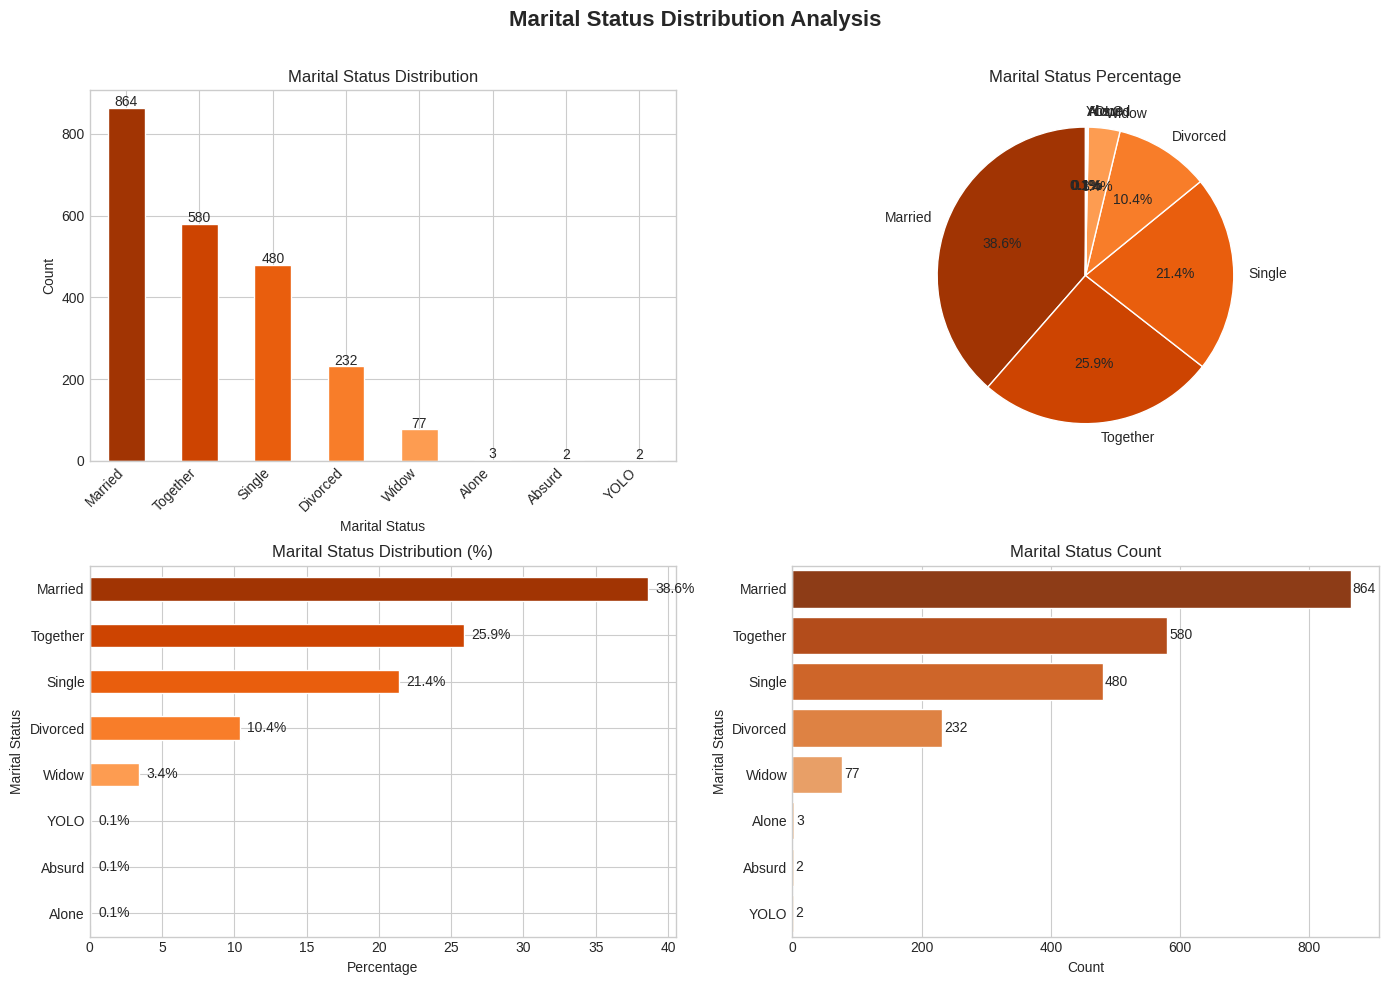

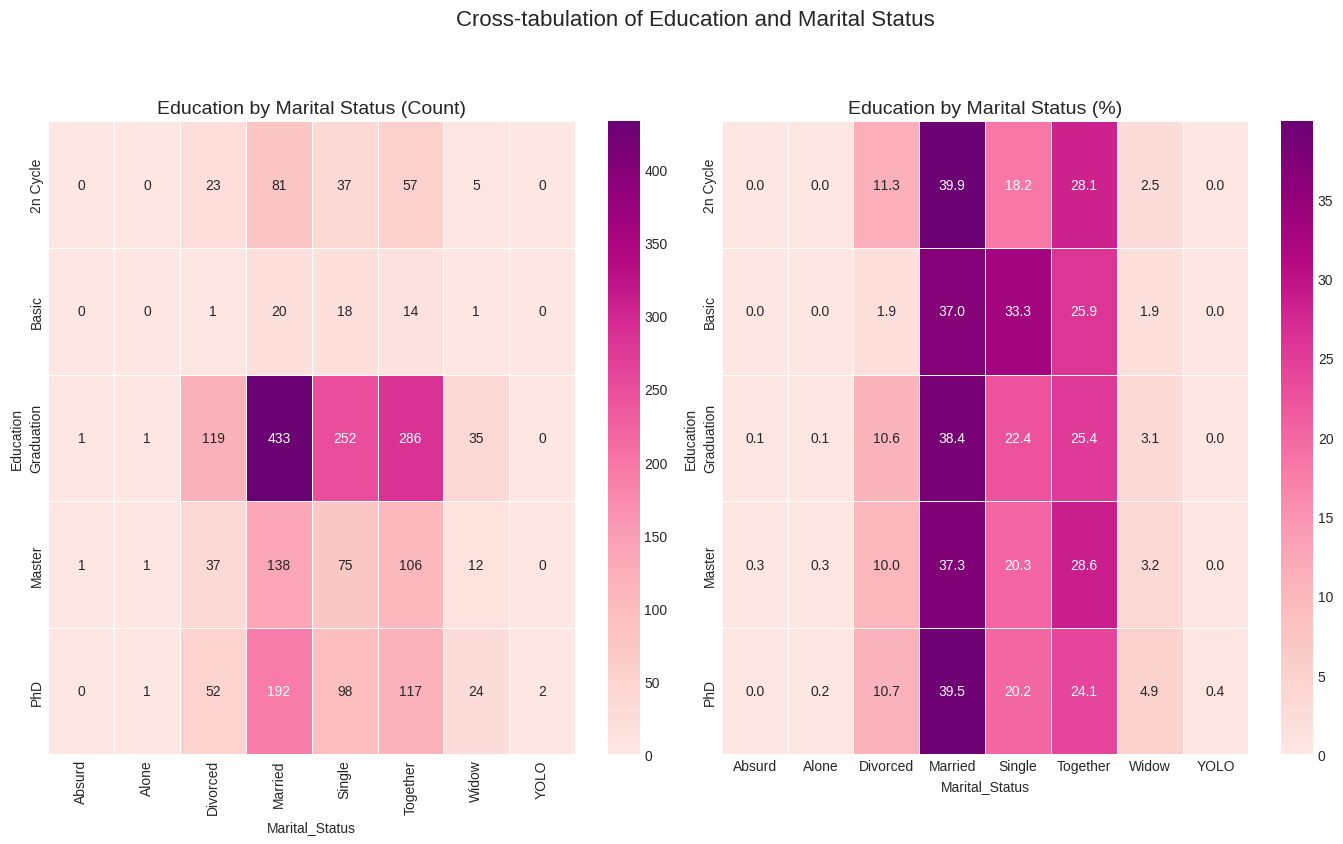

<Figure size 1400x800 with 0 Axes>

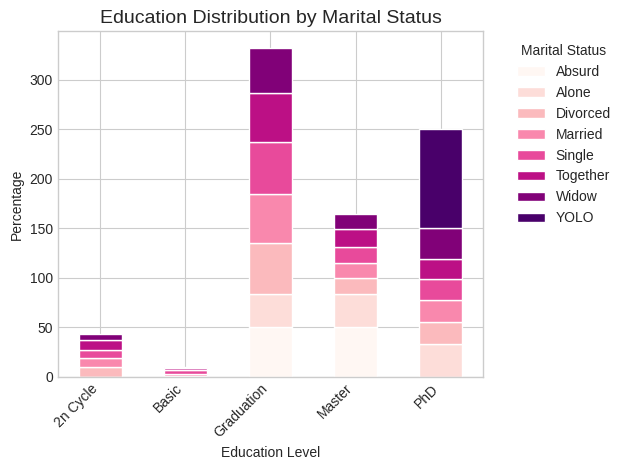

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

education_counts = df['Education'].value_counts()
marital_counts = df['Marital_Status'].value_counts()
edu_marital_cross = pd.crosstab(df['Education'], df['Marital_Status'])

# Set the style for better-looking graphs
plt.style.use('seaborn-v0_8-whitegrid')

# Create a figure for Education distribution
fig1 = plt.figure(figsize=(14, 10))
fig1.suptitle('Education Distribution Analysis', fontsize=16, fontweight='bold')

# 1. Bar chart of education counts
ax1 = plt.subplot(2, 2, 1)
education_counts.sort_values(ascending=False).plot(kind='bar', ax=ax1, color=sns.color_palette("Purples_r", len(education_counts)))
ax1.set_title('Education Distribution')
ax1.set_xlabel('Education Level')
ax1.set_ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Add count labels on top of each bar
for i, v in enumerate(education_counts.sort_values(ascending=False)):
    ax1.text(i, v + 3, str(v), ha='center')

# 2. Pie chart of education distribution with percentages
ax2 = plt.subplot(2, 2, 2)
education_counts.plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90,
                     colors=sns.color_palette("Purples_r", len(education_counts)))
ax2.set_title('Education Level Percentage')
ax2.set_ylabel('')  # Remove the "None" ylabel

# 3. Horizontal bar chart for better readability with percentages
ax3 = plt.subplot(2, 2, 3)
education_percentages = (education_counts / len(df) * 100).round(1)
bars = education_percentages.sort_values().plot(kind='barh', ax=ax3, color=sns.color_palette("Purples", len(education_counts)))
ax3.set_title('Education Distribution (%)')
ax3.set_xlabel('Percentage')
ax3.set_ylabel('Education Level')

# Add percentage labels
for i, v in enumerate(education_percentages.sort_values()):
    ax3.text(v + 0.5, i, f"{v}%", va='center')

# 4. Education distribution by count with a different visualization
ax4 = plt.subplot(2, 2, 4)
sns.countplot(y='Education', data=df, order=df['Education'].value_counts().index, palette="Purples_r", ax=ax4)
ax4.set_title('Education Level Count')
ax4.set_xlabel('Count')
ax4.set_ylabel('Education Level')

# Add count labels
for i, v in enumerate(education_counts.reindex(df['Education'].value_counts().index)):
    ax4.text(v + 3, i, str(v), va='center')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig('education_distribution_analysis.png', dpi=300)
plt.show()

# Create a figure for Marital Status distribution
fig2 = plt.figure(figsize=(14, 10))
fig2.suptitle('Marital Status Distribution Analysis', fontsize=16, fontweight='bold')

# 1. Bar chart of marital status counts
ax1 = plt.subplot(2, 2, 1)
marital_counts.sort_values(ascending=False).plot(kind='bar', ax=ax1, color=sns.color_palette("Oranges_r", len(marital_counts)))
ax1.set_title('Marital Status Distribution')
ax1.set_xlabel('Marital Status')
ax1.set_ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Add count labels on top of each bar
for i, v in enumerate(marital_counts.sort_values(ascending=False)):
    ax1.text(i, v + 3, str(v), ha='center')

# 2. Pie chart of marital status with percentages
ax2 = plt.subplot(2, 2, 2)
marital_counts.plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90,
                   colors=sns.color_palette("Oranges_r", len(marital_counts)))
ax2.set_title('Marital Status Percentage')
ax2.set_ylabel('')  # Remove the "None" ylabel

# 3. Horizontal bar chart for better readability with percentages
ax3 = plt.subplot(2, 2, 3)
marital_percentages = (marital_counts / len(df) * 100).round(1)
bars = marital_percentages.sort_values().plot(kind='barh', ax=ax3, color=sns.color_palette("Oranges", len(marital_counts)))
ax3.set_title('Marital Status Distribution (%)')
ax3.set_xlabel('Percentage')
ax3.set_ylabel('Marital Status')

# Add percentage labels
for i, v in enumerate(marital_percentages.sort_values()):
    ax3.text(v + 0.5, i, f"{v}%", va='center')

# 4. Marital status by count with a different visualization
ax4 = plt.subplot(2, 2, 4)
sns.countplot(y='Marital_Status', data=df, order=df['Marital_Status'].value_counts().index, palette="Oranges_r", ax=ax4)
ax4.set_title('Marital Status Count')
ax4.set_xlabel('Count')
ax4.set_ylabel('Marital Status')

# Add count labels
for i, v in enumerate(marital_counts.reindex(df['Marital_Status'].value_counts().index)):
    ax4.text(v + 3, i, str(v), va='center')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig('marital_status_distribution_analysis.png', dpi=300)
plt.show()

# Create a heat map for the cross-tabulation of Education and Marital Status
plt.figure(figsize=(14, 8))
custom_cmap = LinearSegmentedColormap.from_list("custom_purple_orange",
                                              sns.color_palette("RdPu", 10))

# Create a normalized version for percentage view
edu_marital_pct = edu_marital_cross.div(edu_marital_cross.sum(axis=1), axis=0) * 100

# Plotting the heatmap with counts
plt.subplot(1, 2, 1)
sns.heatmap(edu_marital_cross, annot=True, fmt='d', cmap=custom_cmap, linewidths=.5)
plt.title('Education by Marital Status (Count)', fontsize=14)
plt.tight_layout()

# Plotting the heatmap with percentages (row-wise)
plt.subplot(1, 2, 2)
sns.heatmap(edu_marital_pct, annot=True, fmt='.1f', cmap=custom_cmap, linewidths=.5)
plt.title('Education by Marital Status (%)', fontsize=14)

plt.suptitle('Cross-tabulation of Education and Marital Status', fontsize=16, y=1.05)
plt.tight_layout()
plt.savefig('education_marital_crosstab.png', dpi=300)
plt.show()

# Optional: Create a grouped bar chart comparing education across marital status
plt.figure(figsize=(14, 8))
edu_marital_cross_pct = edu_marital_cross.div(edu_marital_cross.sum(axis=0), axis=1) * 100
edu_marital_cross_pct.plot(kind='bar', stacked=True, colormap='RdPu')
plt.title('Education Distribution by Marital Status', fontsize=14)
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Marital Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('education_by_marital_status.png', dpi=300)
plt.show()

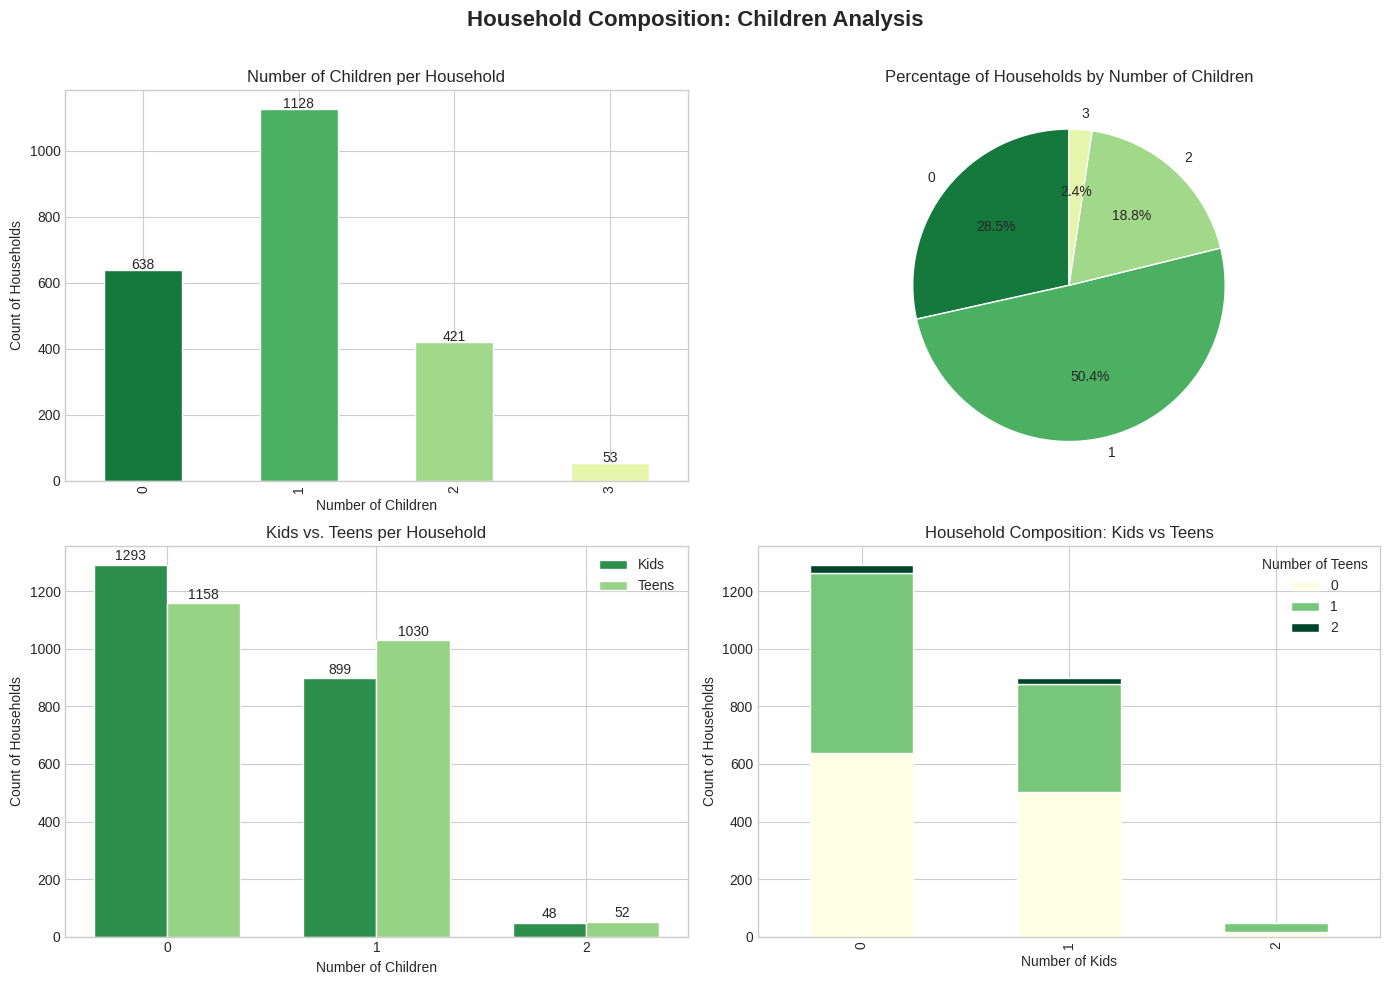

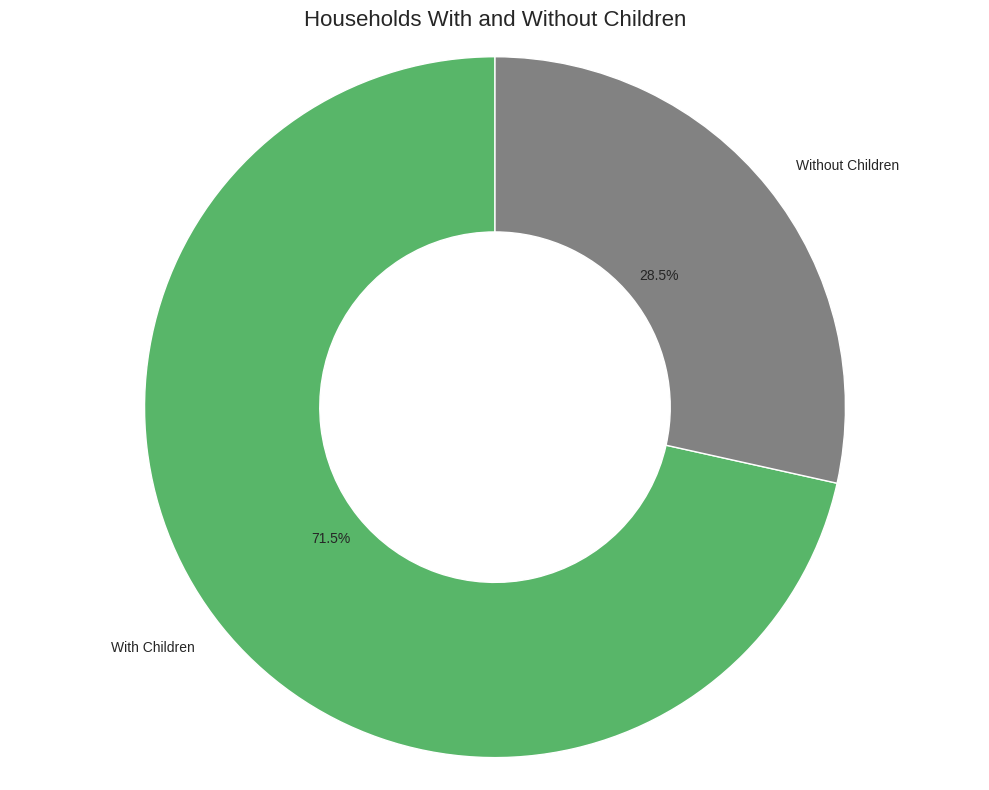

<Figure size 1200x800 with 0 Axes>

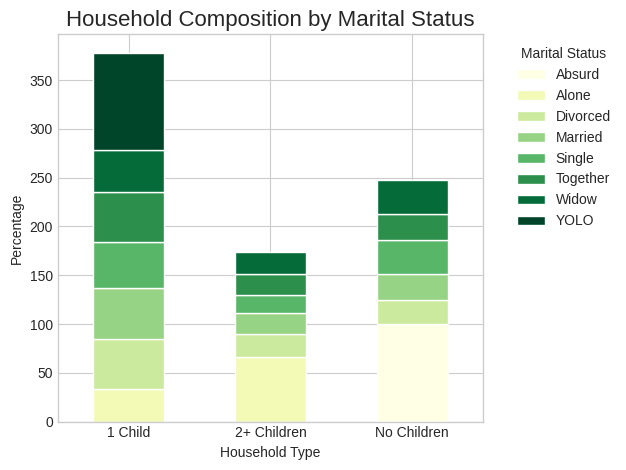

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df['Children'] = df['Kidhome'] + df['Teenhome']
children_counts = df['Children'].value_counts().sort_index()
kidhome_counts = df['Kidhome'].value_counts().sort_index()
teenhome_counts = df['Teenhome'].value_counts().sort_index()

# Set the style for better-looking graphs
plt.style.use('seaborn-v0_8-whitegrid')

# Create a figure for the general children distribution
fig1 = plt.figure(figsize=(14, 10))
fig1.suptitle('Household Composition: Children Analysis', fontsize=16, fontweight='bold')

# 1. Bar chart of total children counts
ax1 = plt.subplot(2, 2, 1)
children_counts.plot(kind='bar', ax=ax1, color=sns.color_palette("YlGn_r", len(children_counts)))
ax1.set_title('Number of Children per Household')
ax1.set_xlabel('Number of Children')
ax1.set_ylabel('Count of Households')

# Add count labels on top of each bar
for i, v in enumerate(children_counts):
    ax1.text(i, v + 3, str(v), ha='center')

# 2. Pie chart of children distribution with percentages
ax2 = plt.subplot(2, 2, 2)
children_percentages = (children_counts / len(df) * 100).round(1)
children_counts.plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90,
                     colors=sns.color_palette("YlGn_r", len(children_counts)))
ax2.set_title('Percentage of Households by Number of Children')
ax2.set_ylabel('')  # Remove the "None" ylabel

# 3. Bar chart comparing distribution of kids and teens
ax3 = plt.subplot(2, 2, 3)
width = 0.35
index = np.arange(max(max(kidhome_counts.index), max(teenhome_counts.index)) + 1)

kid_values = [kidhome_counts.get(i, 0) for i in index]
teen_values = [teenhome_counts.get(i, 0) for i in index]

bars1 = ax3.bar(index - width/2, kid_values, width, label='Kids', color=sns.color_palette("YlGn_r")[1])
bars2 = ax3.bar(index + width/2, teen_values, width, label='Teens', color=sns.color_palette("YlGn_r")[3])

ax3.set_xlabel('Number of Children')
ax3.set_ylabel('Count of Households')
ax3.set_title('Kids vs. Teens per Household')
ax3.set_xticks(index)
ax3.legend()

# Add count labels on top of each bar
for bar in bars1:
    height = bar.get_height()
    if height > 0:
        ax3.text(bar.get_x() + bar.get_width()/2., height + 5, f'{int(height)}',
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    if height > 0:
        ax3.text(bar.get_x() + bar.get_width()/2., height + 5, f'{int(height)}',
                ha='center', va='bottom')

# 4. Stacked bar chart showing household composition
ax4 = plt.subplot(2, 2, 4)

# Create a crosstab of kids and teens
household_comp = pd.crosstab(df['Kidhome'], df['Teenhome'])
household_comp.plot(kind='bar', stacked=True, ax=ax4, colormap='YlGn')
ax4.set_title('Household Composition: Kids vs Teens')
ax4.set_xlabel('Number of Kids')
ax4.set_ylabel('Count of Households')
ax4.legend(title='Number of Teens')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig('household_composition_analysis.png', dpi=300)
plt.show()

# Additional visualization: Donut chart of households with/without children
plt.figure(figsize=(10, 8))

# Calculate households with/without children
with_children = (df['Children'] > 0).sum()
without_children = (df['Children'] == 0).sum()
child_status = pd.Series([with_children, without_children], index=['With Children', 'Without Children'])

# Create a donut chart
plt.pie(child_status, labels=child_status.index, autopct='%1.1f%%', startangle=90,
       colors=[sns.color_palette("YlGn_r")[2], sns.color_palette("Greys")[3]],
       wedgeprops=dict(width=0.5, edgecolor='w'))

plt.title('Households With and Without Children', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.savefig('households_with_without_children.png', dpi=300)
plt.show()

# Additional visualization: Distribution of household compositions by marital status
# Create a categorical representation of household composition
df['Household_Type'] = df['Children'].apply(lambda x: 'No Children' if x == 0 else
                                         ('1 Child' if x == 1 else '2+ Children'))

# Create a crosstab
household_marital = pd.crosstab(df['Household_Type'], df['Marital_Status'])
household_marital_pct = household_marital.div(household_marital.sum(axis=0), axis=1) * 100

plt.figure(figsize=(12, 8))
household_marital_pct.plot(kind='bar', stacked=True, colormap='YlGn')
plt.title('Household Composition by Marital Status', fontsize=16)
plt.xlabel('Household Type')
plt.ylabel('Percentage')
plt.legend(title='Marital Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('household_composition_by_marital_status.png', dpi=300)
plt.show()

In [ ]:
!pip install kneed

Features selected for clustering:
- Age
- Income
- TotalSpending
- TotalSpending_Ratio
- MntWines_Ratio
- MntMeatProducts_Ratio
- MntFishProducts_Ratio
- MntFruits_Ratio
- MntSweetProducts_Ratio
- MntGoldProds_Ratio
- WebRatio
- CatalogRatio
- StoreRatio
- NumWebVisitsMonth
- Children
- CampaignResponsiveness

Total number of features: 16

Feature correlations with TotalSpending:
TotalSpending             1.000000
MntWines_Ratio            0.818359
Income                    0.664775
CatalogRatio              0.659220
MntFishProducts_Ratio     0.511922
MntFruits_Ratio           0.477797
MntSweetProducts_Ratio    0.473967
TotalSpending_Ratio       0.471783
CampaignResponsiveness    0.456206
Response                  0.265298
MntMeatProducts_Ratio     0.190916
Age                       0.111306
MntGoldProds_Ratio        0.109151
WebRatio                 -0.211406
StoreRatio               -0.448003
Children                 -0.498888
NumWebVisitsMonth        -0.500218
Name: TotalSpending, d

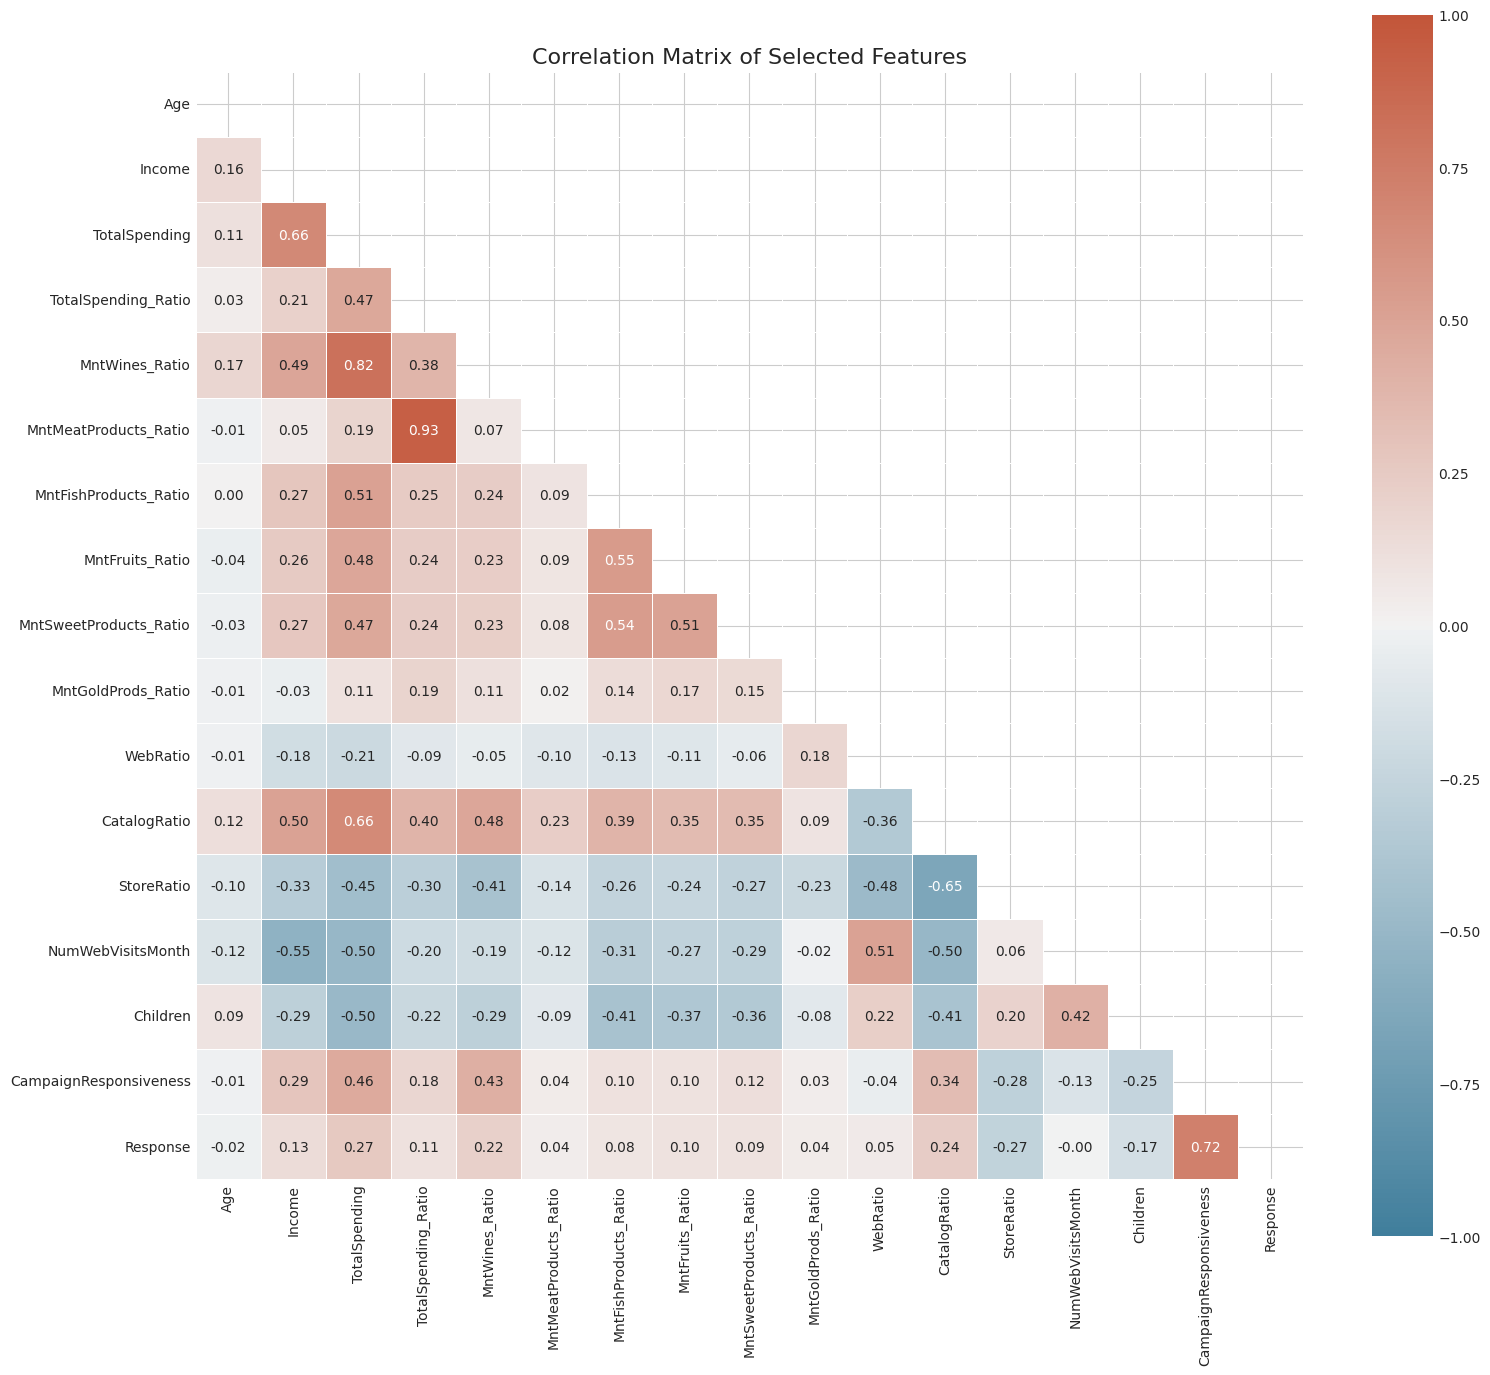

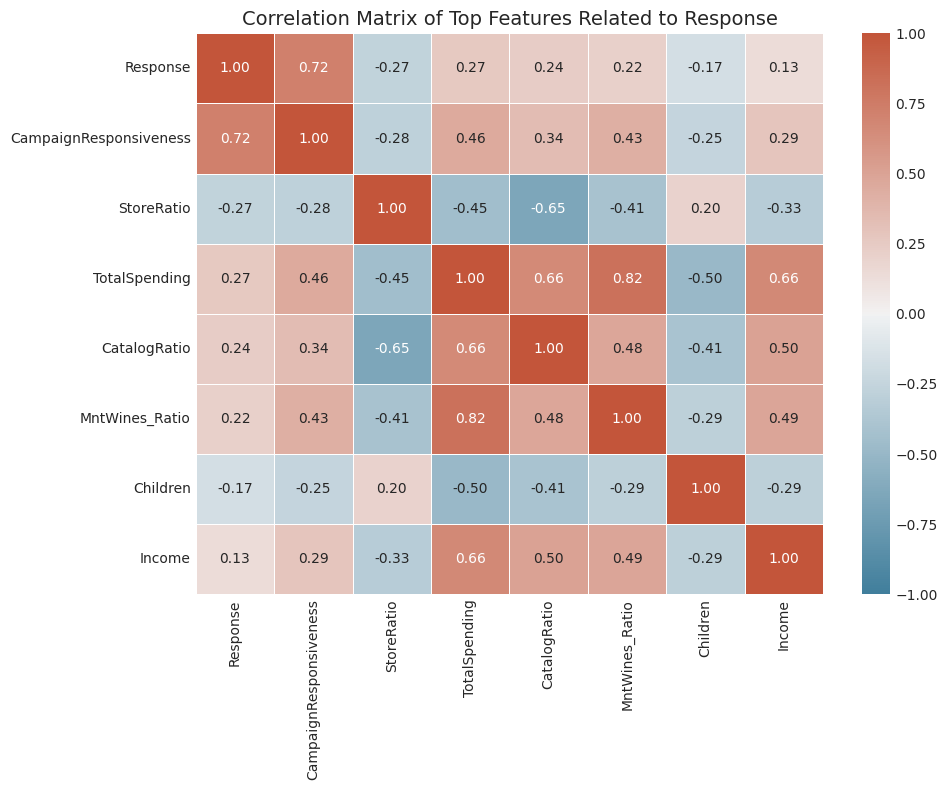

In [ ]:
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix
from kneed import KneeLocator
import seaborn as sns

# Create Total Spending feature
spending_categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['TotalSpending'] = df[spending_categories].sum(axis=1)

# Calculate spending ratios (percentage of income)
for category in spending_categories:
    df[f'{category}_Ratio'] = df[category] / df['Income'] * 100

# Add TotalSpending ratio
df['TotalSpending_Ratio'] = df['TotalSpending'] / df['Income'] * 100

# Create household composition variable
df['Children'] = df['Kidhome'] + df['Teenhome']

# Purchase channel preferences
df['TotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df['WebRatio'] = df['NumWebPurchases'] / df['TotalPurchases'] * 100
df['CatalogRatio'] = df['NumCatalogPurchases'] / df['TotalPurchases'] * 100
df['StoreRatio'] = df['NumStorePurchases'] / df['TotalPurchases'] * 100

# Campaign responsiveness
df['CampaignResponsiveness'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

# Select features for clustering
selected_features = [
    'Age', 'Income', 'TotalSpending', 'TotalSpending_Ratio',
    'MntWines_Ratio', 'MntMeatProducts_Ratio', 'MntFishProducts_Ratio',
    'MntFruits_Ratio', 'MntSweetProducts_Ratio', 'MntGoldProds_Ratio',
    'WebRatio', 'CatalogRatio', 'StoreRatio',
    'NumWebVisitsMonth', 'Children', 'CampaignResponsiveness'
]

# Handle any remaining missing values
df_clustering = df[selected_features].fillna(df[selected_features].median())

# Standardize the features for clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

# Print the features used
print("Features selected for clustering:")
for feature in selected_features:
    print(f"- {feature}")
print(f"\nTotal number of features: {len(selected_features)}")

# Calculate and print correlations with TotalSpending
correlations = df[selected_features + ['Response']].corr()['TotalSpending'].sort_values(ascending=False)
print("\nFeature correlations with TotalSpending:")
print(correlations)

# Calculate correlations with Response
response_corr = df[selected_features + ['Response']].corr()['Response'].sort_values(ascending=False)
print("\nFeature correlations with Response:")
print(response_corr)

# Add correlation matrix visualization
plt.figure(figsize=(16, 14))
correlation_features = selected_features + ['Response']
corr_matrix = df[correlation_features].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    cmap=cmap,
    linewidths=0.5,
    fmt=".2f",
    vmin=-1,
    vmax=1,
    center=0,
    square=True
)
plt.title('Correlation Matrix of Selected Features', fontsize=16)
plt.tight_layout()
plt.show()

# Additional focused correlation matrix for top correlations with Response
top_response_features = response_corr.abs().nlargest(8).index
plt.figure(figsize=(10, 8))
sns.heatmap(
    df[top_response_features].corr(),
    annot=True,
    cmap=cmap,
    linewidths=0.5,
    fmt=".2f",
    vmin=-1,
    vmax=1
)
plt.title('Correlation Matrix of Top Features Related to Response', fontsize=14)
plt.tight_layout()
plt.show()

<ipython-input-29-33d1093d3085>:124: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spending_by_income = df.groupby('Income_Group')[product_categories].mean()


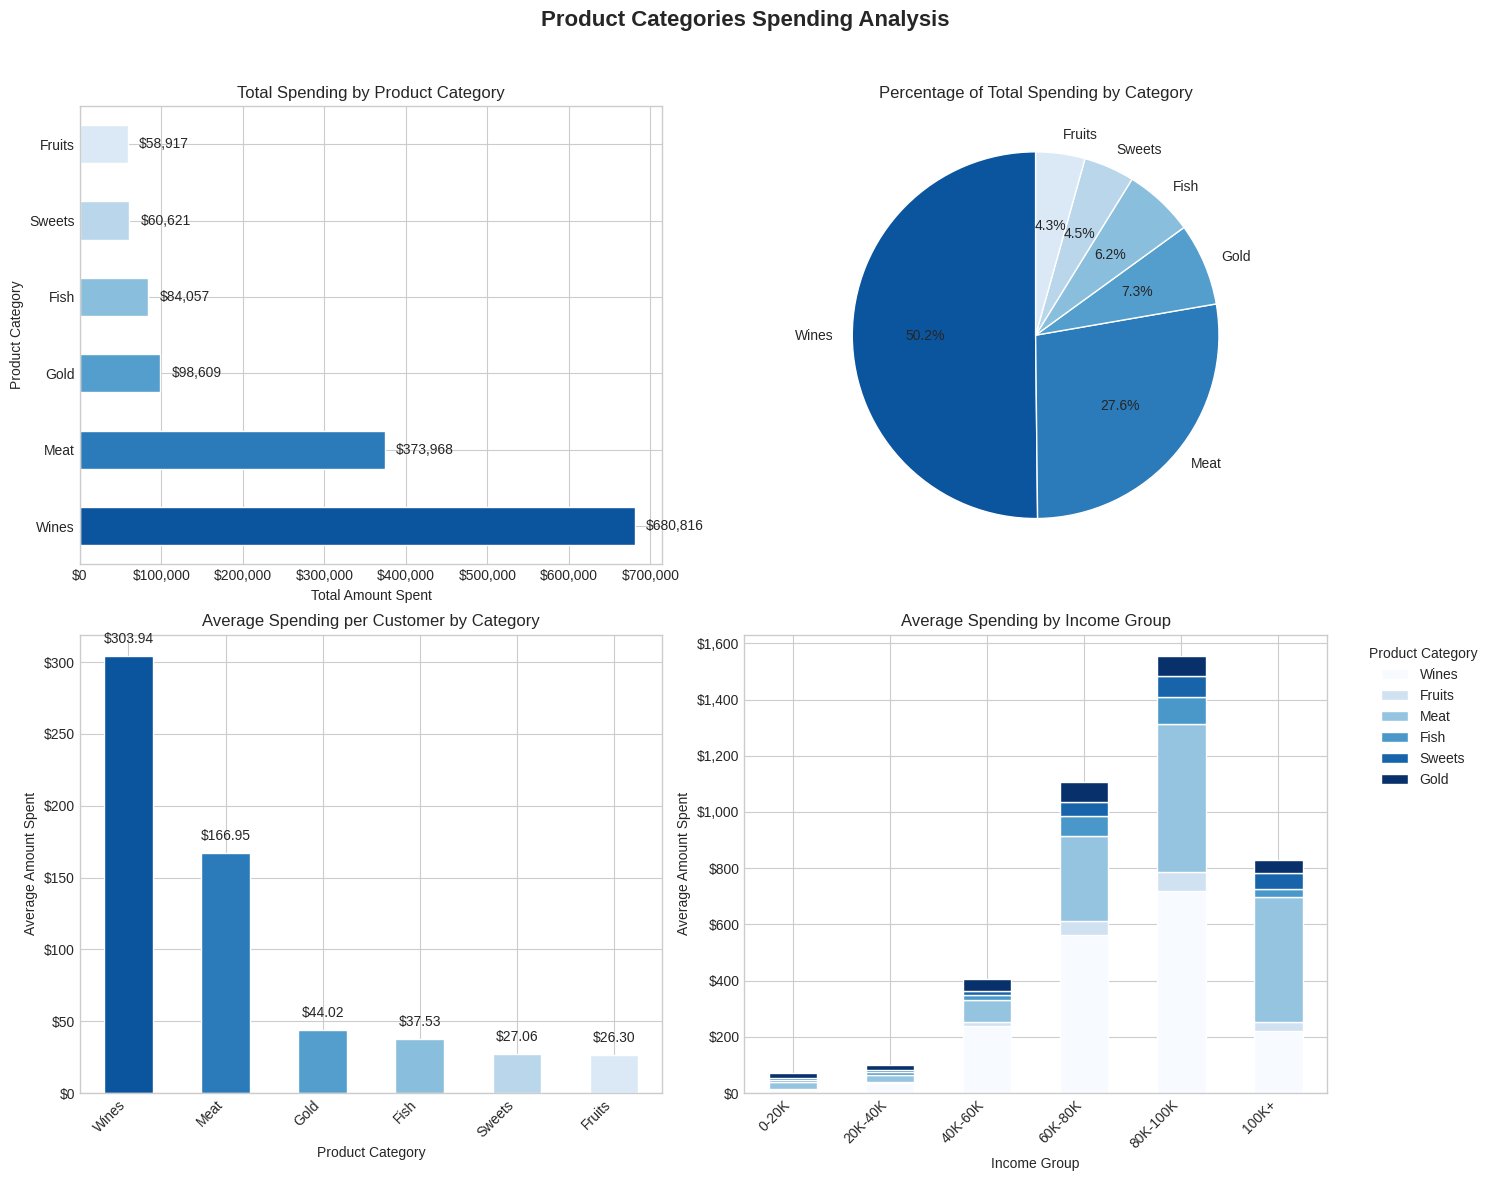

<ipython-input-29-33d1093d3085>:179: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  channel_by_age = df.groupby('Age_Group')[purchase_channels].mean()


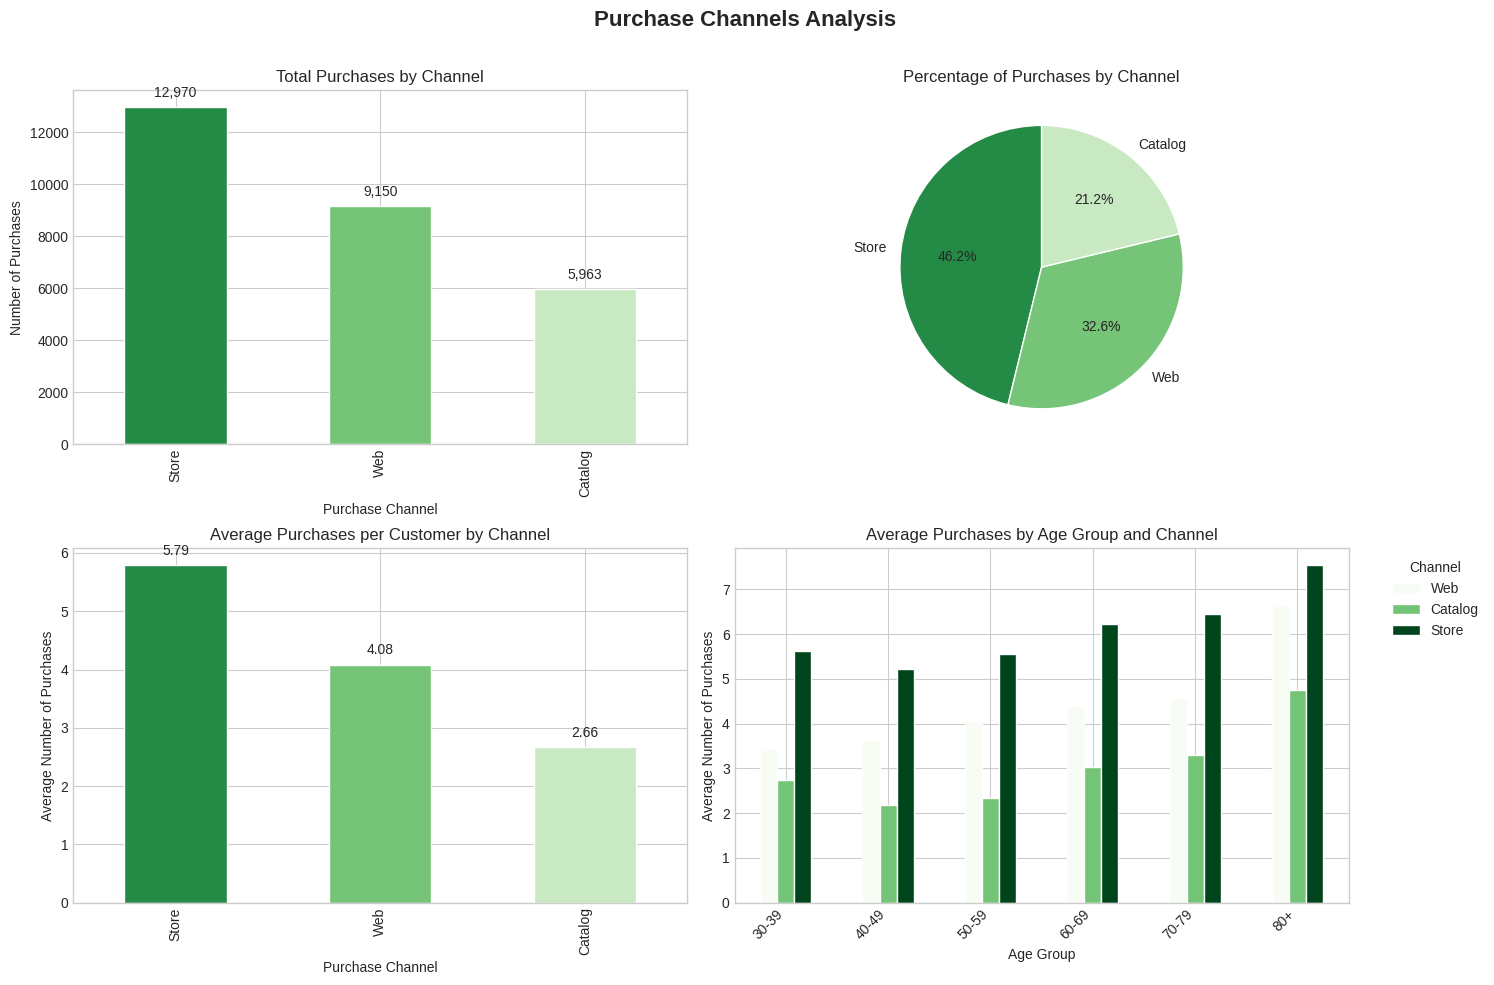

<ipython-input-29-33d1093d3085>:227: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_response = df.groupby('Age_Group')[campaign].mean() * 100
<ipython-input-29-33d1093d3085>:227: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_response = df.groupby('Age_Group')[campaign].mean() * 100
<ipython-input-29-33d1093d3085>:227: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_response = df.groupby('Age_Group')[campaign].me

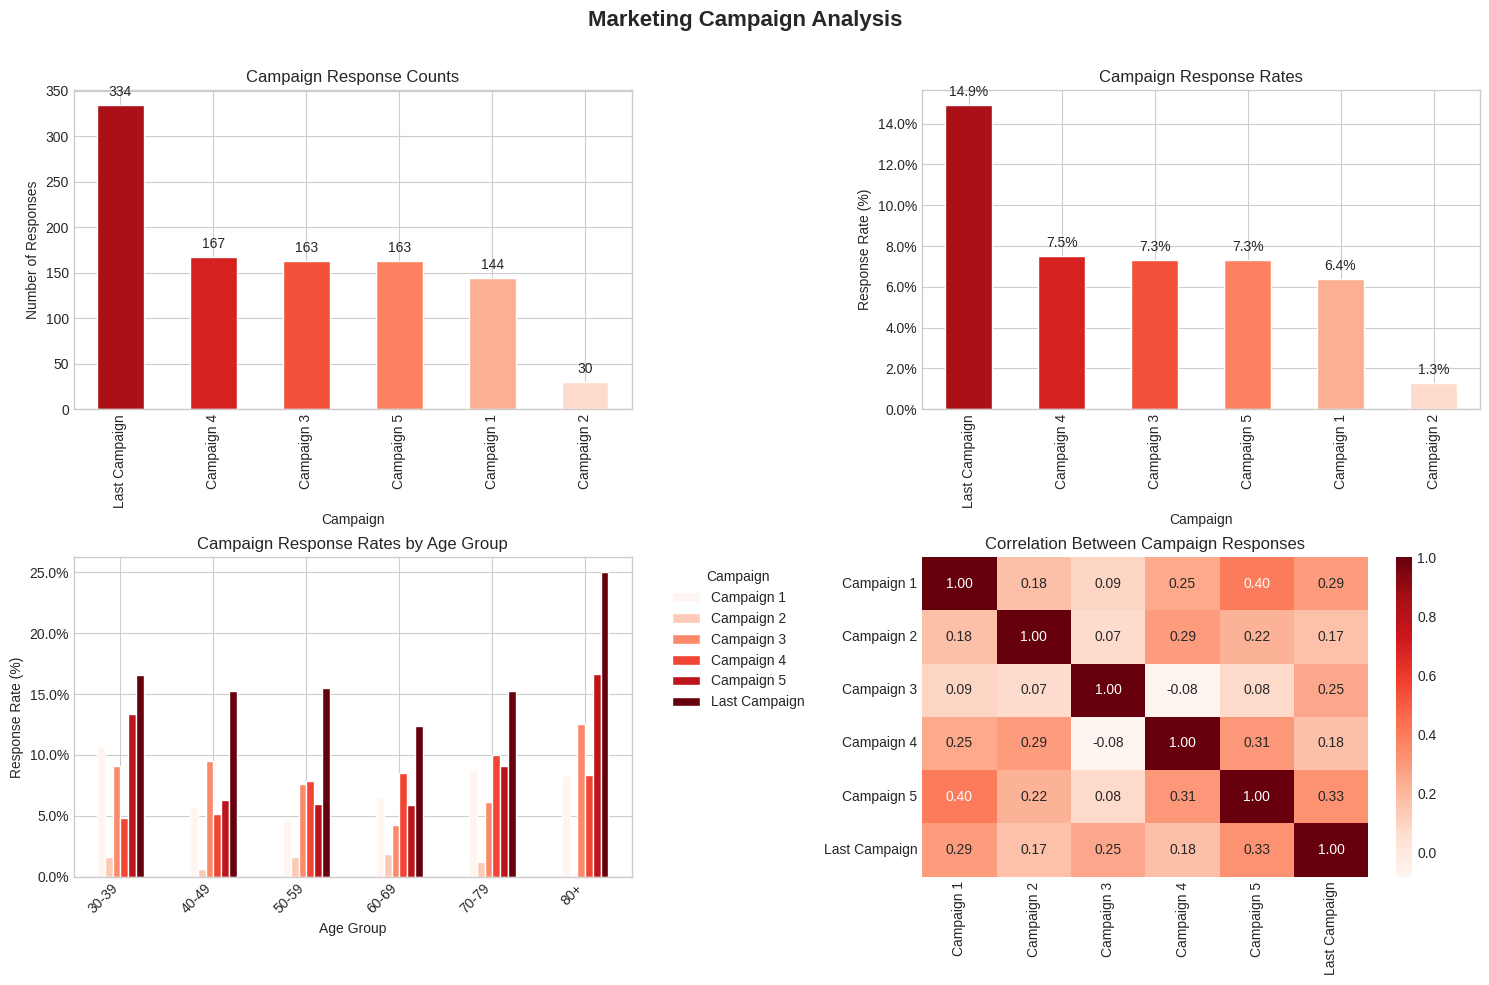

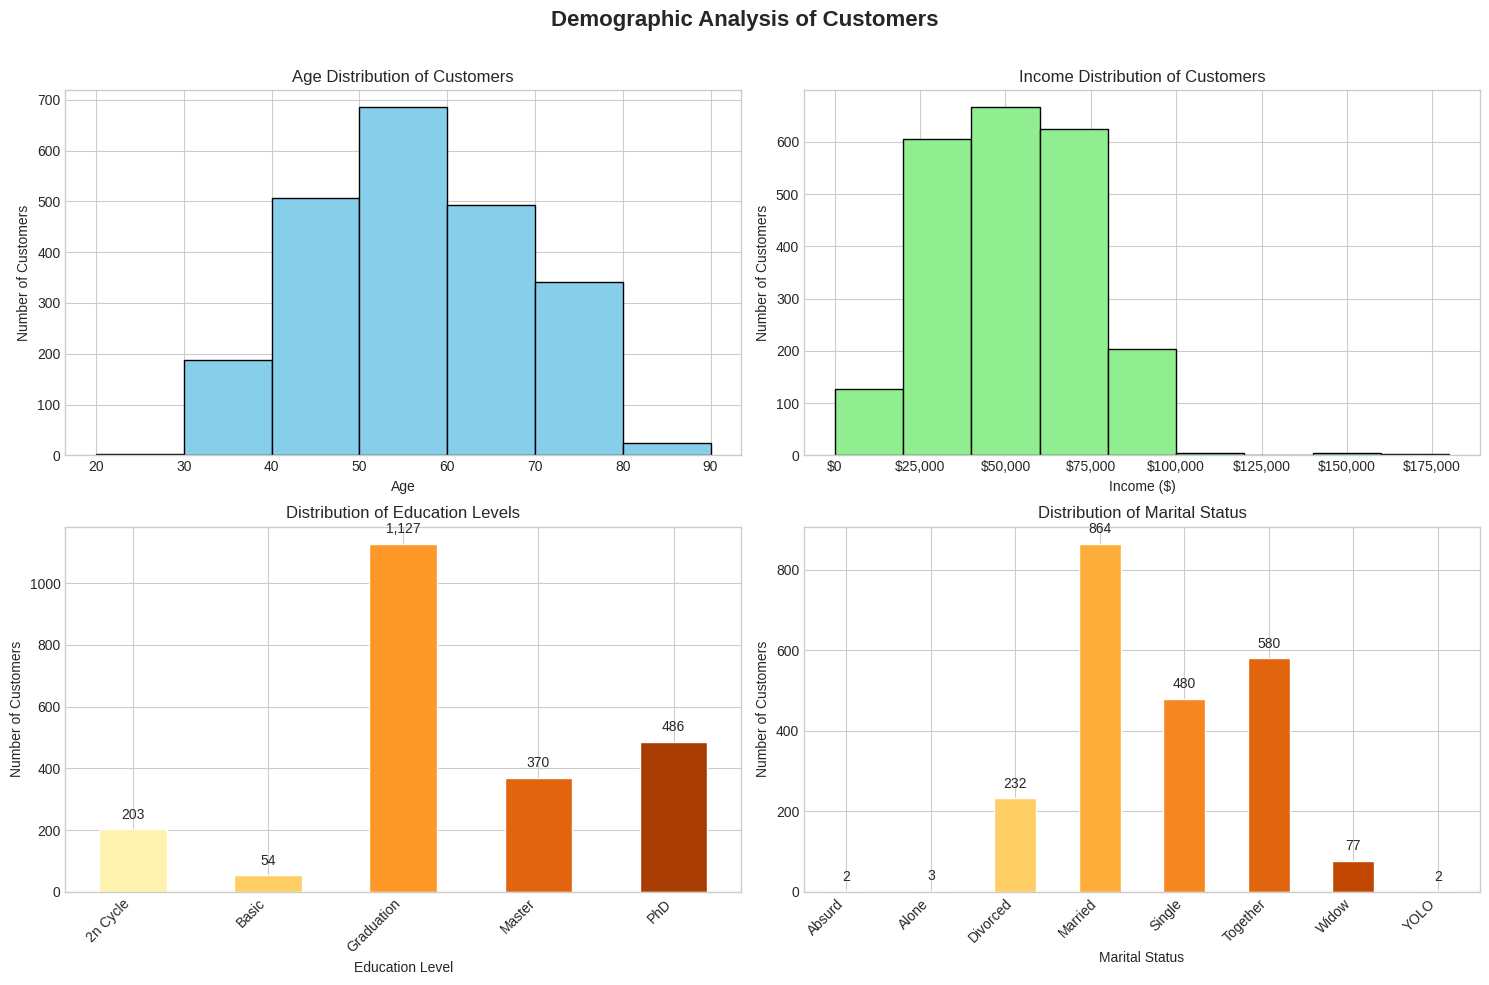

<ipython-input-29-33d1093d3085>:325: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Children', y='TotalSpending', data=df, ax=ax2, palette='Purples')
<ipython-input-29-33d1093d3085>:333: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Education', y='TotalSpending', data=df, ax=ax3, palette='Purples')
<ipython-input-29-33d1093d3085>:342: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Marital_Status', y='TotalSpending', data=df, ax=ax4, palette='Purples')
<ipython-input-29-33d1093d3085>:351: FutureWarning: The default of observed=False is

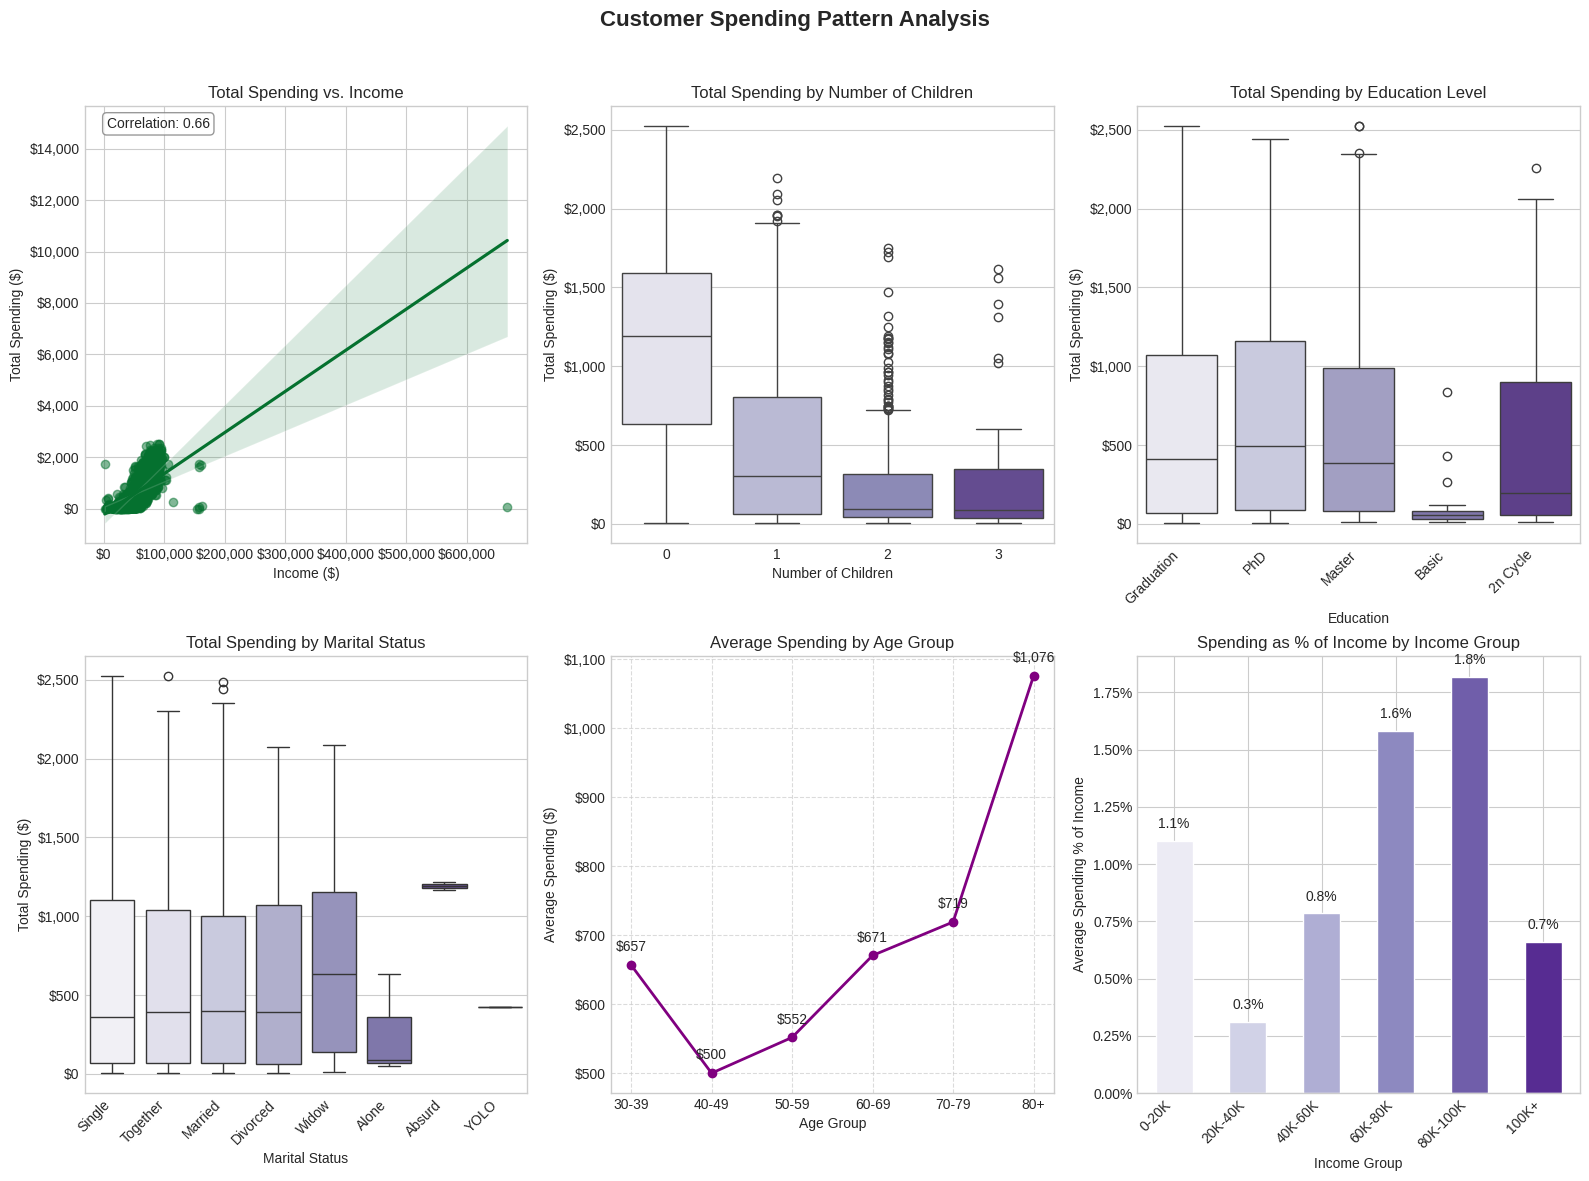

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Set the style for better-looking graphs
plt.style.use('seaborn-v0_8-whitegrid')


# Define product categories
product_categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
product_categories_readable = {
    'MntWines': 'Wines',
    'MntFruits': 'Fruits',
    'MntMeatProducts': 'Meat',
    'MntFishProducts': 'Fish',
    'MntSweetProducts': 'Sweets',
    'MntGoldProds': 'Gold'
}

# Calculate product spending
product_spending = df[product_categories].sum()
product_spending.index = [product_categories_readable.get(col, col) for col in product_spending.index]
product_spending = product_spending.sort_values(ascending=False)

# Calculate average spending per customer by category
avg_spending = df[product_categories].mean()
avg_spending.index = [product_categories_readable.get(col, col) for col in avg_spending.index]
avg_spending = avg_spending.sort_values(ascending=False)

# Purchase channels
purchase_channels = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
channel_readable = {
    'NumWebPurchases': 'Web',
    'NumCatalogPurchases': 'Catalog',
    'NumStorePurchases': 'Store'
}

# Total purchases by channel
total_purchases_by_channel = df[purchase_channels].sum()
total_purchases_by_channel.index = [channel_readable.get(col, col) for col in total_purchases_by_channel.index]
total_purchases_by_channel = total_purchases_by_channel.sort_values(ascending=False)

# Campaign columns
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
campaign_readable = {
    'AcceptedCmp1': 'Campaign 1',
    'AcceptedCmp2': 'Campaign 2',
    'AcceptedCmp3': 'Campaign 3',
    'AcceptedCmp4': 'Campaign 4',
    'AcceptedCmp5': 'Campaign 5',
    'Response': 'Last Campaign'
}

# Calculate campaign response counts
campaign_response = df[campaign_columns].sum()
campaign_response.index = [campaign_readable.get(col, col) for col in campaign_response.index]
campaign_response = campaign_response.sort_values(ascending=False)

# Create age groups if not already done
if 'Age_Group' not in df.columns:
    df['Age_Group'] = pd.cut(
        df['Age'],
        bins=[0, 30, 40, 50, 60, 100],
        labels=['<30', '30-40', '41-50', '51-60', '60+']
    )

# Create income quintiles if not already done
if 'Income_Group' not in df.columns:
    df['Income_Group'] = pd.qcut(
        df['Income_filled'],
        5,
        labels=['Q1 (Lowest)', 'Q2', 'Q3', 'Q4', 'Q5 (Highest)']
    )

# 1. PRODUCT CATEGORIES SPENDING ANALYSIS
fig1 = plt.figure(figsize=(15, 12))
fig1.suptitle('Product Categories Spending Analysis', fontsize=16, fontweight='bold')

# 1.1 Horizontal bar chart for total spending by category
ax1 = plt.subplot(2, 2, 1)
product_spending.plot(kind='barh', ax=ax1, color=sns.color_palette("Blues_r", len(product_spending)))
ax1.set_title('Total Spending by Product Category')
ax1.set_xlabel('Total Amount Spent')
ax1.set_ylabel('Product Category')

# Format the x-axis with dollar signs and commas
ax1.xaxis.set_major_formatter('${x:,.0f}')

# Add amount labels
for i, v in enumerate(product_spending):
    ax1.text(v + (product_spending.max() * 0.02), i, f'${v:,.0f}', va='center')

# 1.2 Pie chart for percentage of total spending
ax2 = plt.subplot(2, 2, 2)
spending_pct = (product_spending / product_spending.sum() * 100).round(1)
product_spending.plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90,
                     colors=sns.color_palette("Blues_r", len(product_spending)))
ax2.set_title('Percentage of Total Spending by Category')
ax2.set_ylabel('')  # Remove the "None" ylabel

# 1.3 Bar chart for average spending per category
ax3 = plt.subplot(2, 2, 3)
bars = avg_spending.plot(kind='bar', ax=ax3, color=sns.color_palette("Blues_r", len(avg_spending)))
ax3.set_title('Average Spending per Customer by Category')
ax3.set_xlabel('Product Category')
ax3.set_ylabel('Average Amount Spent')
ax3.yaxis.set_major_formatter('${x:,.0f}')
plt.xticks(rotation=45, ha='right')

# Add average amount labels
for i, v in enumerate(avg_spending):
    ax3.text(i, v + (avg_spending.max() * 0.03), f'${v:,.2f}', ha='center')

# 1.4 Stacked bar showing spending distribution across income groups
ax4 = plt.subplot(2, 2, 4)

# Create a new DataFrame with readable category names
df_spending = df[product_categories].copy()
df_spending.columns = [product_categories_readable[col] for col in product_categories]

# Group by Income_Group, not Income (which is continuous)
spending_by_income = df.groupby('Income_Group')[product_categories].mean()
spending_by_income.columns = [product_categories_readable[col] for col in spending_by_income.columns]
spending_by_income.plot(kind='bar', stacked=True, ax=ax4, colormap='Blues')
ax4.set_title('Average Spending by Income Group')
ax4.set_xlabel('Income Group')
ax4.set_ylabel('Average Amount Spent')
ax4.yaxis.set_major_formatter('${x:,.0f}')
plt.xticks(rotation=45, ha='right')
ax4.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig('product_spending_analysis.png', dpi=300)
plt.show()

# 2. PURCHASE CHANNELS ANALYSIS
fig2 = plt.figure(figsize=(15, 10))
fig2.suptitle('Purchase Channels Analysis', fontsize=16, fontweight='bold')

# 2.1 Bar chart for total purchases by channel
ax1 = plt.subplot(2, 2, 1)
bars = total_purchases_by_channel.plot(kind='bar', ax=ax1, color=sns.color_palette("Greens_r", len(total_purchases_by_channel)))
ax1.set_title('Total Purchases by Channel')
ax1.set_xlabel('Purchase Channel')
ax1.set_ylabel('Number of Purchases')

# Add count labels
for i, v in enumerate(total_purchases_by_channel):
    ax1.text(i, v + (total_purchases_by_channel.max() * 0.03), f'{v:,.0f}', ha='center')

# 2.2 Pie chart for percentage of purchases by channel
ax2 = plt.subplot(2, 2, 2)
channel_pct = (total_purchases_by_channel / total_purchases_by_channel.sum() * 100).round(1)
total_purchases_by_channel.plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90,
                            colors=sns.color_palette("Greens_r", len(total_purchases_by_channel)))
ax2.set_title('Percentage of Purchases by Channel')
ax2.set_ylabel('')  # Remove the "None" ylabel

# 2.3 Average purchases per customer by channel
ax3 = plt.subplot(2, 2, 3)
avg_purchases = df[purchase_channels].mean()
avg_purchases.index = [channel_readable[col] for col in avg_purchases.index]
avg_purchases = avg_purchases.sort_values(ascending=False)

bars = avg_purchases.plot(kind='bar', ax=ax3, color=sns.color_palette("Greens_r", len(avg_purchases)))
ax3.set_title('Average Purchases per Customer by Channel')
ax3.set_xlabel('Purchase Channel')
ax3.set_ylabel('Average Number of Purchases')

# Add average labels
for i, v in enumerate(avg_purchases):
    ax3.text(i, v + (avg_purchases.max() * 0.03), f'{v:.2f}', ha='center')

# 2.4 Channel preference by age group
ax4 = plt.subplot(2, 2, 4)
channel_by_age = df.groupby('Age_Group')[purchase_channels].mean()
channel_by_age.columns = [channel_readable[col] for col in channel_by_age.columns]
channel_by_age.plot(kind='bar', ax=ax4, colormap='Greens')
ax4.set_title('Average Purchases by Age Group and Channel')
ax4.set_xlabel('Age Group')
ax4.set_ylabel('Average Number of Purchases')
ax4.legend(title='Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig('purchase_channels_analysis.png', dpi=300)
plt.show()

# 3. CAMPAIGN RESPONSIVENESS ANALYSIS
fig3 = plt.figure(figsize=(15, 10))
fig3.suptitle('Marketing Campaign Analysis', fontsize=16, fontweight='bold')

# 3.1 Bar chart for campaign response counts
ax1 = plt.subplot(2, 2, 1)
bars = campaign_response.plot(kind='bar', ax=ax1, color=sns.color_palette("Reds_r", len(campaign_response)))
ax1.set_title('Campaign Response Counts')
ax1.set_xlabel('Campaign')
ax1.set_ylabel('Number of Responses')

# Add count labels
for i, v in enumerate(campaign_response):
    ax1.text(i, v + (campaign_response.max() * 0.03), f'{v:,.0f}', ha='center')

# 3.2 Bar chart for campaign response rates
ax2 = plt.subplot(2, 2, 2)
response_rates = (campaign_response / len(df) * 100).round(1)
bars = response_rates.plot(kind='bar', ax=ax2, color=sns.color_palette("Reds_r", len(response_rates)))
ax2.set_title('Campaign Response Rates')
ax2.set_xlabel('Campaign')
ax2.set_ylabel('Response Rate (%)')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

# Add percentage labels
for i, v in enumerate(response_rates):
    ax2.text(i, v + (response_rates.max() * 0.03), f'{v:.1f}%', ha='center')

# 3.3 Stacked bar chart: Campaign response by age group
ax3 = plt.subplot(2, 2, 3)
campaign_age = pd.DataFrame()

for campaign in campaign_columns:
    if campaign in df.columns:
        age_response = df.groupby('Age_Group')[campaign].mean() * 100
        campaign_age[campaign_readable[campaign]] = age_response

campaign_age.plot(kind='bar', ax=ax3, colormap='Reds')
ax3.set_title('Campaign Response Rates by Age Group')
ax3.set_xlabel('Age Group')
ax3.set_ylabel('Response Rate (%)')
ax3.yaxis.set_major_formatter(mtick.PercentFormatter())
ax3.legend(title='Campaign', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

# 3.4 Heatmap of campaign correlations
ax4 = plt.subplot(2, 2, 4)
campaign_corr = df[campaign_columns].corr()
campaign_corr.index = [campaign_readable[col] for col in campaign_corr.index]
campaign_corr.columns = [campaign_readable[col] for col in campaign_corr.columns]

sns.heatmap(campaign_corr, annot=True, cmap='Reds', fmt='.2f', ax=ax4)
ax4.set_title('Correlation Between Campaign Responses')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig('campaign_response_analysis.png', dpi=300)
plt.show()

# 5. DEMOGRAPHIC ANALYSIS
fig5 = plt.figure(figsize=(15, 10))
fig5.suptitle('Demographic Analysis of Customers', fontsize=16, fontweight='bold')

# 5.1 Age distribution
ax1 = plt.subplot(2, 2, 1)
age_bins = [20, 30, 40, 50, 60, 70, 80, 90]
df['Age'].hist(bins=age_bins, ax=ax1, color='skyblue', edgecolor='black')
ax1.set_title('Age Distribution of Customers')
ax1.set_xlabel('Age')
ax1.set_ylabel('Number of Customers')

# 5.2 Income distribution
ax2 = plt.subplot(2, 2, 2)
income_bins = np.arange(0, 200000, 20000)
df['Income_filled'].hist(bins=income_bins, ax=ax2, color='lightgreen', edgecolor='black')
ax2.set_title('Income Distribution of Customers')
ax2.set_xlabel('Income ($)')
ax2.set_ylabel('Number of Customers')
ax2.xaxis.set_major_formatter('${x:,.0f}')

# 5.3 Education level distribution
ax3 = plt.subplot(2, 2, 3)
education_counts = df['Education'].value_counts().sort_index()
bars = education_counts.plot(kind='bar', ax=ax3, color=sns.color_palette("YlOrBr", len(education_counts)))
ax3.set_title('Distribution of Education Levels')
ax3.set_xlabel('Education Level')
ax3.set_ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')

# Add count labels
for i, v in enumerate(education_counts):
    ax3.text(i, v + (education_counts.max() * 0.03), f'{v:,.0f}', ha='center')

# 5.4 Marital status distribution
ax4 = plt.subplot(2, 2, 4)
marital_counts = df['Marital_Status'].value_counts().sort_index()
bars = marital_counts.plot(kind='bar', ax=ax4, color=sns.color_palette("YlOrBr", len(marital_counts)))
ax4.set_title('Distribution of Marital Status')
ax4.set_xlabel('Marital Status')
ax4.set_ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')

# Add count labels
for i, v in enumerate(marital_counts):
    ax4.text(i, v + (marital_counts.max() * 0.03), f'{v:,.0f}', ha='center')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig('demographic_analysis.png', dpi=300)
plt.show()

# 6. SPENDING PATTERNS ANALYSIS
fig6 = plt.figure(figsize=(16, 12))
fig6.suptitle('Customer Spending Pattern Analysis', fontsize=16, fontweight='bold')

# 6.1 Scatter plot of spending vs. income with regression line
ax1 = plt.subplot(2, 3, 1)
sns.regplot(x='Income', y='TotalSpending', data=df, scatter_kws={'alpha':0.5}, ax=ax1)
ax1.set_title('Total Spending vs. Income')
ax1.set_xlabel('Income ($)')
ax1.set_ylabel('Total Spending ($)')
ax1.xaxis.set_major_formatter('${x:,.0f}')
ax1.yaxis.set_major_formatter('${x:,.0f}')

# Calculate correlation coefficient
spending_income_corr = df['TotalSpending'].corr(df['Income'])
ax1.annotate(f'Correlation: {spending_income_corr:.2f}',
             xy=(0.05, 0.95), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# 6.2 Box plot of spending by number of children
ax2 = plt.subplot(2, 3, 2)
sns.boxplot(x='Children', y='TotalSpending', data=df, ax=ax2, palette='Purples')
ax2.set_title('Total Spending by Number of Children')
ax2.set_xlabel('Number of Children')
ax2.set_ylabel('Total Spending ($)')
ax2.yaxis.set_major_formatter('${x:,.0f}')

# 6.3 Box plot of spending by education
ax3 = plt.subplot(2, 3, 3)
sns.boxplot(x='Education', y='TotalSpending', data=df, ax=ax3, palette='Purples')
ax3.set_title('Total Spending by Education Level')
ax3.set_xlabel('Education')
ax3.set_ylabel('Total Spending ($)')
ax3.yaxis.set_major_formatter('${x:,.0f}')
plt.xticks(rotation=45, ha='right')

# 6.4 Box plot of spending by marital status
ax4 = plt.subplot(2, 3, 4)
sns.boxplot(x='Marital_Status', y='TotalSpending', data=df, ax=ax4, palette='Purples')
ax4.set_title('Total Spending by Marital Status')
ax4.set_xlabel('Marital Status')
ax4.set_ylabel('Total Spending ($)')
ax4.yaxis.set_major_formatter('${x:,.0f}')
plt.xticks(rotation=45, ha='right')

# 6.5 Line plot of average spending by age group
ax5 = plt.subplot(2, 3, 5)
age_spending = df.groupby('Age_Group')['TotalSpending'].mean().sort_index()
age_spending.plot(kind='line', marker='o', ax=ax5, color='purple', linewidth=2)
ax5.set_title('Average Spending by Age Group')
ax5.set_xlabel('Age Group')
ax5.set_ylabel('Average Spending ($)')
ax5.yaxis.set_major_formatter('${x:,.0f}')
ax5.grid(True, linestyle='--', alpha=0.7)

# Add average amount labels
for i, v in enumerate(age_spending):
    ax5.annotate(f'${v:,.0f}',
                xy=(i, v),
                xytext=(0, 10),
                textcoords='offset points',
                ha='center')

# 6.6 Spending ratio (% of income) by income group
ax6 = plt.subplot(2, 3, 6)
spending_ratio_by_income = df.groupby('Income_Group')['TotalSpending_Ratio'].mean().sort_index()
bars = spending_ratio_by_income.plot(kind='bar', ax=ax6, color=sns.color_palette("Purples", len(spending_ratio_by_income)))
ax6.set_title('Spending as % of Income by Income Group')
ax6.set_xlabel('Income Group')
ax6.set_ylabel('Average Spending % of Income')
ax6.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=45, ha='right')

# Add percentage labels
for i, v in enumerate(spending_ratio_by_income):
    ax6.text(i, v + (spending_ratio_by_income.max() * 0.03), f'{v:.1f}%', ha='center')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig('spending_patterns_analysis.png', dpi=300)
plt.show()

In [ ]:
!pip install kneed

Identified 109 outliers out of 2240 records
NaN values before handling: 12
NaN values after imputation: 0
Scaled data is clean (no NaNs)


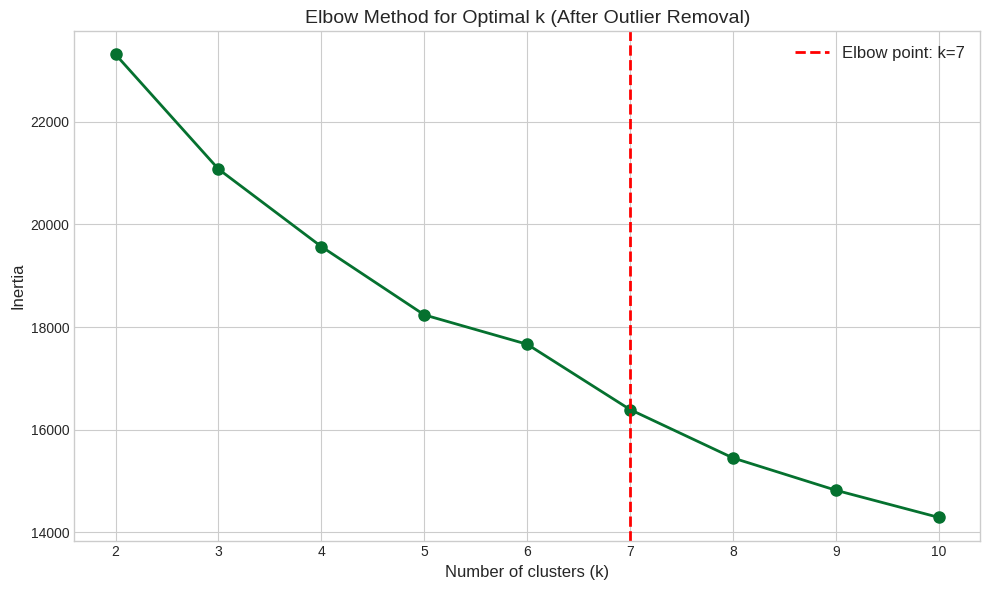

Elbow Method suggests optimal k = 7

Proceeding with k = 7 clusters for K-means

Cluster Summary Statistics:
           Age    Income TotalSpending TotalSpending_Ratio MntWines  \
          mean      mean          mean                mean     mean   
Cluster                                                               
0        61.41  60795.74       1004.43                1.65   719.39   
1        58.37  70339.82       1251.56                1.78   510.98   
2        55.39  39987.67        247.51                0.59   135.44   
3        53.46  34364.34         60.15                0.18    26.51   
4        59.41  62314.11        622.59                0.98   297.55   
5        53.27  80893.38       1578.10                1.98   858.40   
6        51.00   6852.00        394.50                5.75    74.00   

        MntMeatProducts MntFishProducts NumWebVisitsMonth  \
                   mean            mean              mean   
Cluster                                                   

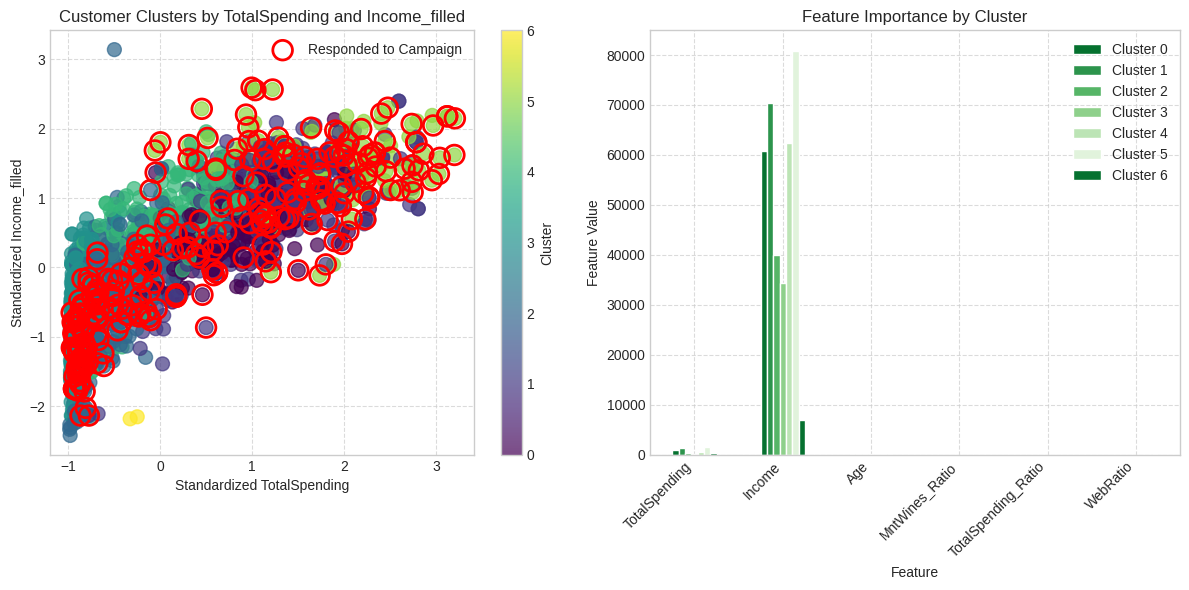


Detailed Cluster Profiles:

Cluster 0 - 225 customers:
  Average Age: 61.4 years
  Average Income: $60,795.74
  Average Spending: $1,004.43 (1.65% of income)
  Wine as % of purchases: 71.62%
  Campaign Response Rate: 16.44%
  Preferred Channel: Store
  Average Children: 1.07

Cluster 1 - 336 customers:
  Average Age: 58.4 years
  Average Income: $70,339.82
  Average Spending: $1,251.56 (1.78% of income)
  Wine as % of purchases: 40.83%
  Campaign Response Rate: 13.39%
  Preferred Channel: Store
  Average Children: 0.29

Cluster 2 - 522 customers:
  Average Age: 55.4 years
  Average Income: $39,987.67
  Average Spending: $247.51 (0.59% of income)
  Wine as % of purchases: 54.72%
  Campaign Response Rate: 17.24%
  Preferred Channel: Web
  Average Children: 1.25

Cluster 3 - 648 customers:
  Average Age: 53.5 years
  Average Income: $34,364.34
  Average Spending: $60.15 (0.18% of income)
  Wine as % of purchases: 44.07%
  Campaign Response Rate: 4.32%
  Preferred Channel: Store
  Average

In [ ]:
# Step 1: Identify and handle outliers before clustering
def remove_outliers(df, columns, threshold=3):
    """
    Remove outliers from the dataframe based on Z-score
    Parameters:
        df: DataFrame to process
        columns: List of columns to check for outliers
        threshold: Z-score threshold (default 3)
    Returns:
        DataFrame with outliers removed
    """
    df_clean = df.copy()
    outlier_indices = []

    for col in columns:
        # Skip non-numeric columns
        if not np.issubdtype(df_clean[col].dtype, np.number):
            continue

        # Calculate z-scores
        z_scores = np.abs((df_clean[col] - df_clean[col].mean()) / df_clean[col].std())

        # Identify outliers
        outliers = z_scores > threshold
        outlier_indices.extend(df_clean[outliers].index.tolist())

    # Get unique indices
    outlier_indices = list(set(outlier_indices))
    print(f"Identified {len(outlier_indices)} outliers out of {len(df_clean)} records")

    # Remove outliers
    df_clean = df_clean.drop(outlier_indices)
    return df_clean

# Define columns to check for outliers
outlier_columns = [
    'Income_filled', 'TotalSpending', 'TotalSpending_Ratio',
    'MntWines', 'MntMeatProducts', 'MntFishProducts'
]

# Remove outliers
df_clean = remove_outliers(df, outlier_columns, threshold=3)

# Check for NaN values and handle them
print(f"NaN values before handling: {df_clean[selected_features].isna().sum().sum()}")

# Handle NaN values by imputing with median
from sklearn.impute import SimpleImputer

# Create imputer
imputer = SimpleImputer(strategy='median')

# Apply imputer to the selected features
df_clean_imputed = pd.DataFrame(
    imputer.fit_transform(df_clean[selected_features]),
    columns=selected_features,
    index=df_clean.index
)

# Check that NaNs are gone
print(f"NaN values after imputation: {df_clean_imputed.isna().sum().sum()}")

# Copy other columns back to the dataframe
for col in df_clean.columns:
    if col not in selected_features:
        df_clean_imputed[col] = df_clean[col]

# Step 2: Scale the imputed data
scaler = StandardScaler()
df_clean_scaled = scaler.fit_transform(df_clean_imputed[selected_features])

# Verify no NaNs in scaled data
if np.isnan(df_clean_scaled).any():
    print("Warning: NaN values found in scaled data")
else:
    print("Scaled data is clean (no NaNs)")

# Step 3: Find optimal k using Elbow Method
inertia = []
k_range = range(2, 11)  # Test from 2 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_clean_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'o-', linewidth=2, markersize=8)
plt.xlabel('Number of clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method for Optimal k (After Outlier Removal)', fontsize=14)
plt.grid(True)

# Try to automatically detect the elbow point
from kneed import KneeLocator
kl = KneeLocator(k_range, inertia, curve='convex', direction='decreasing')
if kl.elbow:
    plt.axvline(x=kl.elbow, color='r', linestyle='--', linewidth=2,
                label=f'Elbow point: k={kl.elbow}')
    plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

# Print the result
print(f"Elbow Method suggests optimal k = {kl.elbow if kl.elbow else 'Unclear'}")
optimal_k = kl.elbow if kl.elbow else 5  # Default to 5 if no clear elbow is found
print(f"\nProceeding with k = {optimal_k} clusters for K-means")

# Step 4: Perform K-means with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_clean_scaled)

# Add cluster labels to the cleaned dataframe
df_clean_imputed['Cluster'] = clusters

# Step 5: Analyze the resulting clusters
cluster_summary = df_clean_imputed.groupby('Cluster').agg({
    'Age': 'mean',
    'Income': 'mean',
    'TotalSpending': 'mean',
    'TotalSpending_Ratio': 'mean',
    'MntWines': 'mean',
    'MntMeatProducts': 'mean',
    'MntFishProducts': 'mean',
    'NumWebVisitsMonth': 'mean',
    'CampaignResponsiveness': 'mean',
    'Response': ['mean', 'count'],
    'WebRatio': 'mean',
    'CatalogRatio': 'mean',
    'StoreRatio': 'mean',
    'Children': 'mean'
}).round(2)

print("\nCluster Summary Statistics:")
print(cluster_summary)

# Cross-tabulation of clusters and response
response_by_cluster = pd.crosstab(df_clean_imputed['Cluster'], df_clean_imputed['Response'], normalize='index') * 100
print("\nResponse Rate by Cluster (%):")
print(response_by_cluster.round(2))

# Step 6: Visualize the clusters
plt.figure(figsize=(14, 8))

# Select two important features for visualization
feature_x = 'TotalSpending'
feature_y = 'Income_filled'

# Standardize these features for consistent visualization
x_std = (df_clean_imputed[feature_x] - df_clean_imputed[feature_x].mean()) / df_clean_imputed[feature_x].std()
y_std = (df_clean_imputed[feature_y] - df_clean_imputed[feature_y].mean()) / df_clean_imputed[feature_y].std()

# Plot clusters
plt.subplot(1, 2, 1)
scatter = plt.scatter(x_std, y_std, c=df_clean_imputed['Cluster'], cmap='viridis', s=100, alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.xlabel(f'Standardized {feature_x}')
plt.ylabel(f'Standardized {feature_y}')
plt.title(f'Customer Clusters by {feature_x} and {feature_y}')
plt.grid(True, linestyle='--', alpha=0.7)

# Mark Response=1 customers
response_mask = df_clean_imputed['Response'] == 1
plt.scatter(x_std[response_mask], y_std[response_mask],
            s=200, facecolors='none', edgecolors='red', linewidth=2,
            label='Responded to Campaign')
plt.legend()

# Visualize the feature importance for each cluster
plt.subplot(1, 2, 2)

# Calculate the cluster centers in the original feature space
centers_std = kmeans.cluster_centers_
centers = scaler.inverse_transform(centers_std)

# Create a DataFrame with the cluster centers
centers_df = pd.DataFrame(centers, columns=selected_features)

# Select the top features for visualization
top_features = ['TotalSpending', 'Income', 'Age', 'MntWines_Ratio',
                'TotalSpending_Ratio', 'WebRatio']

# Plot the cluster centers for the top features
centers_plot = centers_df[top_features].T
centers_plot.plot(kind='bar', figsize=(12, 6), ax=plt.gca())
plt.title('Feature Importance by Cluster')
plt.ylabel('Feature Value')
plt.xlabel('Feature')
plt.legend([f'Cluster {i}' for i in range(optimal_k)])
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Step 7: Create detailed cluster profiles
cluster_profiles = {}

for cluster in range(optimal_k):
    cluster_data = df_clean_imputed[df_clean_imputed['Cluster'] == cluster]

    # Calculate key metrics
    avg_age = cluster_data['Age'].mean()
    avg_income = cluster_data['Income'].mean()
    avg_spending = cluster_data['TotalSpending'].mean()
    spending_pct = cluster_data['TotalSpending_Ratio'].mean()

    # Protect against division by zero
    total_spending = cluster_data['TotalSpending'].sum()
    if total_spending > 0:
        wine_pct = cluster_data['MntWines'].sum() / total_spending * 100
    else:
        wine_pct = 0

    response_rate = cluster_data['Response'].mean() * 100

    # Determine dominant shopping channel
    channels = ['WebRatio', 'CatalogRatio', 'StoreRatio']
    channel_means = [cluster_data[channel].mean() for channel in channels]
    dominant_channel = channels[np.argmax(channel_means)].replace('Ratio', '')

    # Create profile description
    profile = {
        "count": len(cluster_data),
        "avg_age": round(avg_age, 1),
        "avg_income": round(avg_income, 2),
        "avg_spending": round(avg_spending, 2),
        "spending_pct_income": round(spending_pct, 2),
        "wine_pct": round(wine_pct, 2),
        "response_rate": round(response_rate, 2),
        "dominant_channel": dominant_channel,
        "children_avg": round(cluster_data['Children'].mean(), 2)
    }

    cluster_profiles[cluster] = profile

print("\nDetailed Cluster Profiles:")
for cluster, profile in cluster_profiles.items():
    print(f"\nCluster {cluster} - {profile['count']} customers:")
    print(f"  Average Age: {profile['avg_age']} years")
    print(f"  Average Income: ${profile['avg_income']:,.2f}")
    print(f"  Average Spending: ${profile['avg_spending']:,.2f} ({profile['spending_pct_income']}% of income)")
    print(f"  Wine as % of purchases: {profile['wine_pct']}%")
    print(f"  Campaign Response Rate: {profile['response_rate']}%")
    print(f"  Preferred Channel: {profile['dominant_channel']}")
    print(f"  Average Children: {profile['children_avg']}")

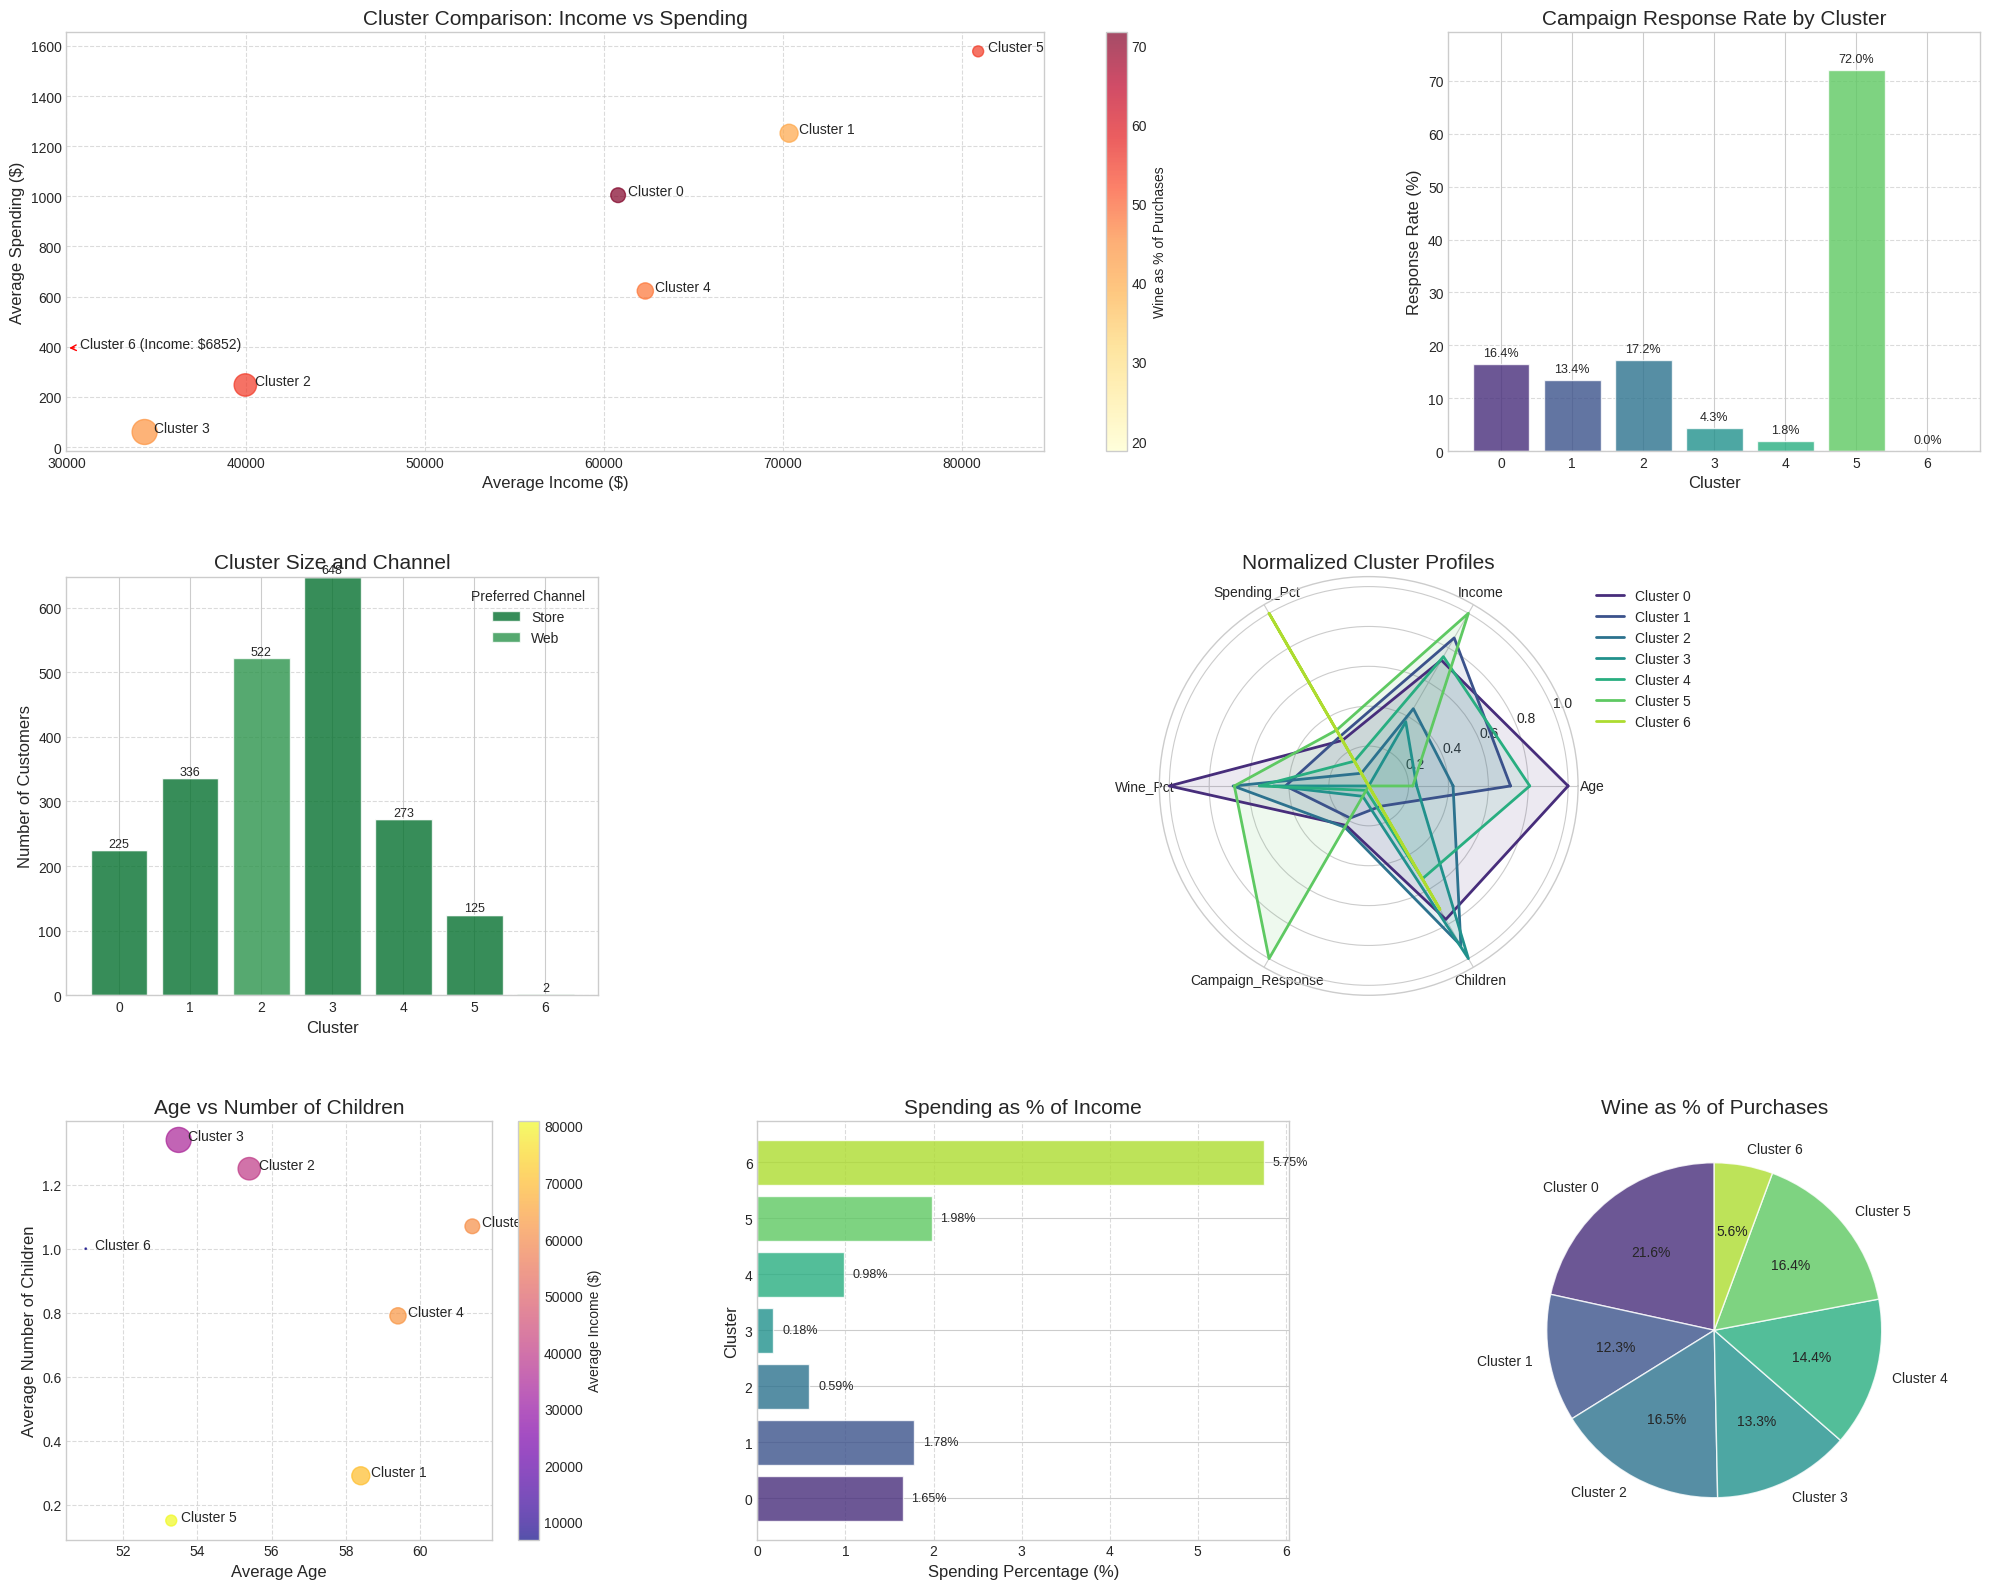

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Create DataFrame from cluster data
clusters = {
    'Cluster': [0, 1, 2, 3, 4, 5, 6],
    'Size': [225, 336, 522, 648, 273, 125, 2],
    'Age': [61.4, 58.4, 55.4, 53.5, 59.4, 53.3, 51.0],
    'Income': [60795.74, 70339.82, 39987.67, 34364.34, 62314.11, 80893.38, 6852.00],
    'Spending': [1004.43, 1251.56, 247.51, 60.15, 622.59, 1578.10, 394.50],
    'Spending_Pct': [1.65, 1.78, 0.59, 0.18, 0.98, 1.98, 5.75],
    'Wine_Pct': [71.62, 40.83, 54.72, 44.07, 47.79, 54.39, 18.76],
    'Campaign_Response': [16.44, 13.39, 17.24, 4.32, 1.83, 72.0, 0.0],
    'Children': [1.07, 0.29, 1.25, 1.34, 0.79, 0.15, 1.0],
    'Channel': ['Store', 'Store', 'Web', 'Store', 'Store', 'Store', 'Web']
}

df = pd.DataFrame(clusters)

# Set a consistent color palette
cluster_colors = sns.color_palette("viridis", len(df))

# Create a bubble chart layout with multiple subplots
plt.figure(figsize=(20, 16))
gs = GridSpec(3, 3, figure=plt.gcf())

# 1. Bubble Chart: Income vs Spending with size as cluster size and color as wine percentage
ax1 = plt.subplot(gs[0, :2])
scatter = ax1.scatter(
    df['Income'],
    df['Spending'],
    s=df['Size']/2,  # Size proportional to cluster size
    c=df['Wine_Pct'],  # Color based on wine percentage
    alpha=0.7,
    cmap='YlOrRd'
)

# Add cluster labels
for i, row in df.iterrows():
    ax1.annotate(f"Cluster {row['Cluster']}",
                (row['Income'], row['Spending']),
                xytext=(7, 0),
                textcoords='offset points')

ax1.set_title('Cluster Comparison: Income vs Spending', fontsize=15)
ax1.set_xlabel('Average Income ($)', fontsize=12)
ax1.set_ylabel('Average Spending ($)', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.7)

# Add colorbar for wine percentage
cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label('Wine as % of Purchases', fontsize=10)

# Handle the outlier in income (Cluster 6)
if df['Income'].min() < 10000:
    ax1.set_xlim(left=30000)
    # Add an annotation for the excluded point
    excluded_cluster = df[df['Income'] < 10000]
    if not excluded_cluster.empty:
        ax1.annotate(f"Cluster {excluded_cluster['Cluster'].values[0]} (Income: ${excluded_cluster['Income'].values[0]:.0f})",
                    (30000, excluded_cluster['Spending'].values[0]),
                    xytext=(10, 0),
                    textcoords='offset points',
                    arrowprops=dict(arrowstyle="->", color='red'))

# 2. Bar Chart: Campaign Response Rate by Cluster
ax2 = plt.subplot(gs[0, 2])
bars = ax2.bar(
    df['Cluster'],
    df['Campaign_Response'],
    color=cluster_colors,
    alpha=0.8
)

ax2.set_title('Campaign Response Rate by Cluster', fontsize=15)
ax2.set_xlabel('Cluster', fontsize=12)
ax2.set_ylabel('Response Rate (%)', fontsize=12)
ax2.set_ylim(0, max(df['Campaign_Response']) * 1.1)  # Add 10% padding
ax2.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax2.text(
        bar.get_x() + bar.get_width()/2.,
        height + 1,
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontsize=9
    )

# 3. Stacked Bar Chart: Cluster Composition (Size and Channel)
ax3 = plt.subplot(gs[1, 0])
df_grouped = df.groupby(['Channel'])['Size'].sum().reset_index()
channel_sizes = {}
for channel in df_grouped['Channel'].unique():
    channel_sizes[channel] = [row['Size'] if row['Channel'] == channel else 0 for _, row in df.iterrows()]

bottom = np.zeros(len(df))
for channel, sizes in channel_sizes.items():
    ax3.bar(df['Cluster'], sizes, bottom=bottom, label=channel, alpha=0.8)
    bottom += sizes

ax3.set_title('Cluster Size and Channel', fontsize=15)
ax3.set_xlabel('Cluster', fontsize=12)
ax3.set_ylabel('Number of Customers', fontsize=12)
ax3.legend(title='Preferred Channel')
ax3.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add total size labels
for i, size in enumerate(df['Size']):
    ax3.text(i, size + 5, f'{size}', ha='center', fontsize=9)

# 4. Radar Chart: Customer Profiles
ax4 = plt.subplot(gs[1, 1:], polar=True)

# Select metrics for radar chart and normalize them
metrics = ['Age', 'Income', 'Spending_Pct', 'Wine_Pct', 'Campaign_Response', 'Children']
df_radar = df[metrics].copy()

# Normalize each metric to 0-1 scale
for metric in metrics:
    df_radar[metric] = (df_radar[metric] - df_radar[metric].min()) / (df_radar[metric].max() - df_radar[metric].min())

# Set up angles for radar chart
angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # Close the loop

# Plot each cluster
for i, row in df_radar.iterrows():
    values = row.values.flatten().tolist()
    values += values[:1]  # Close the loop
    ax4.plot(angles, values, linewidth=2, label=f'Cluster {df.iloc[i]["Cluster"]}', color=cluster_colors[i])
    ax4.fill(angles, values, alpha=0.1, color=cluster_colors[i])

# Add labels and grid
ax4.set_xticks(angles[:-1])
ax4.set_xticklabels(metrics)
ax4.set_title('Normalized Cluster Profiles', fontsize=15)
ax4.grid(True)
ax4.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

# 5. Scatter Plot: Age vs Children with Income as color
ax5 = plt.subplot(gs[2, 0])
scatter = ax5.scatter(
    df['Age'],
    df['Children'],
    s=df['Size']/2,  # Size proportional to cluster size
    c=df['Income'],  # Color based on income
    alpha=0.7,
    cmap='plasma'
)

# Add cluster labels
for i, row in df.iterrows():
    ax5.annotate(f"Cluster {row['Cluster']}",
                (row['Age'], row['Children']),
                xytext=(7, 0),
                textcoords='offset points')

ax5.set_title('Age vs Number of Children', fontsize=15)
ax5.set_xlabel('Average Age', fontsize=12)
ax5.set_ylabel('Average Number of Children', fontsize=12)
ax5.grid(True, linestyle='--', alpha=0.7)

# Add colorbar for income
cbar = plt.colorbar(scatter, ax=ax5)
cbar.set_label('Average Income ($)', fontsize=10)

# 6. Horizontal Bar Chart: Spending as % of Income
ax6 = plt.subplot(gs[2, 1])
bars = ax6.barh(
    df['Cluster'],
    df['Spending_Pct'],
    color=cluster_colors,
    alpha=0.8
)

ax6.set_title('Spending as % of Income', fontsize=15)
ax6.set_xlabel('Spending Percentage (%)', fontsize=12)
ax6.set_ylabel('Cluster', fontsize=12)
ax6.grid(True, axis='x', linestyle='--', alpha=0.7)

# Add value labels on bars
for bar in bars:
    width = bar.get_width()
    ax6.text(
        width + 0.1,
        bar.get_y() + bar.get_height()/2.,
        f'{width:.2f}%',
        ha='left',
        va='center',
        fontsize=9
    )

# 7. Pie Chart: Wine as % of Purchases
ax7 = plt.subplot(gs[2, 2])
ax7.pie(
    df['Wine_Pct'],
    labels=[f'Cluster {cl}' for cl in df['Cluster']],
    autopct='%1.1f%%',
    startangle=90,
    colors=cluster_colors,
    wedgeprops={'alpha': 0.8}
)
ax7.set_title('Wine as % of Purchases', fontsize=15)

plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.savefig('cluster_visualizations.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Define segment names based on the cluster profiles
segment_names = {
    0: "Affluent Wine Enthusiasts",
    1: "Premium Empty Nesters",
    2: "Budget-Conscious Web Shoppers",
    3: "Low-Engagement Families",
    4: "Disengaged Mature Shoppers",
    5: "High-Value Campaign Responders",
    6: "Outlier Web Shoppers"
}

# Map cluster numbers to segment names
df_clean_imputed['Segment'] = df_clean_imputed['Cluster'].map(segment_names)

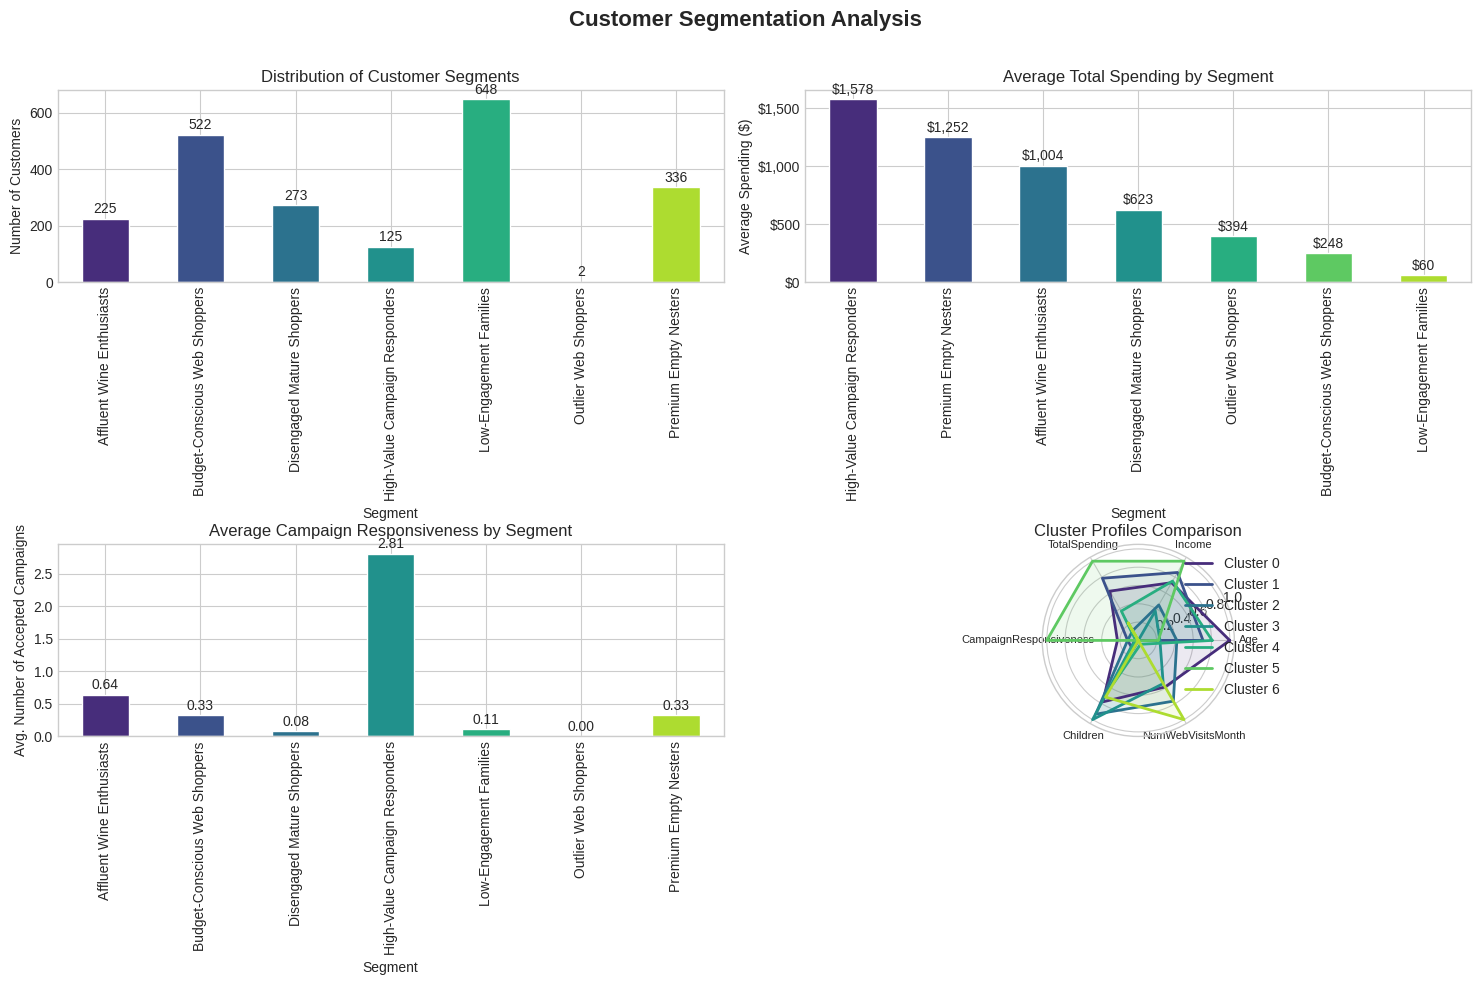

In [ ]:
#CUSTOMER SEGMENTATION ANALYSIS (based on Segment and Cluster columns)
fig4 = plt.figure(figsize=(15, 10))
fig4.suptitle('Customer Segmentation Analysis', fontsize=16, fontweight='bold')

# 4.1 Bar chart of segments distribution
ax1 = plt.subplot(2, 2, 1)
segment_counts = df_clean_imputed['Segment'].value_counts().sort_index()
bars = segment_counts.plot(kind='bar', ax=ax1, color=sns.color_palette("viridis", len(segment_counts)))
ax1.set_title('Distribution of Customer Segments')
ax1.set_xlabel('Segment')
ax1.set_ylabel('Number of Customers')

# Add count labels
for i, v in enumerate(segment_counts):
    ax1.text(i, v + (segment_counts.max() * 0.03), f'{v:,.0f}', ha='center')

# 4.2 Average spending by segment
ax2 = plt.subplot(2, 2, 2)
avg_spending_by_segment = df.groupby('Segment')['TotalSpending'].mean().sort_values(ascending=False)
bars = avg_spending_by_segment.plot(kind='bar', ax=ax2, color=sns.color_palette("viridis", len(avg_spending_by_segment)))
ax2.set_title('Average Total Spending by Segment')
ax2.set_xlabel('Segment')
ax2.set_ylabel('Average Spending ($)')
ax2.yaxis.set_major_formatter('${x:,.0f}')

# Add average amount labels
for i, v in enumerate(avg_spending_by_segment):
    ax2.text(i, v + (avg_spending_by_segment.max() * 0.03), f'${v:,.0f}', ha='center')

# 4.3 Campaign responsiveness by segment
ax3 = plt.subplot(2, 2, 3)
response_by_segment = df_clean_imputed.groupby('Segment')['CampaignResponsiveness'].mean()
bars = response_by_segment.plot(kind='bar', ax=ax3, color=sns.color_palette("viridis", len(response_by_segment)))
ax3.set_title('Average Campaign Responsiveness by Segment')
ax3.set_xlabel('Segment')
ax3.set_ylabel('Avg. Number of Accepted Campaigns')

# Add average labels
for i, v in enumerate(response_by_segment):
    ax3.text(i, v + (response_by_segment.max() * 0.03), f'{v:.2f}', ha='center')

# 4.4 Radar chart / Spider plot for cluster profiles
ax4 = plt.subplot(2, 2, 4, polar=True)

# Select key metrics for cluster profiling
profile_metrics = ['Age', 'Income', 'TotalSpending', 'CampaignResponsiveness', 'Children', 'NumWebVisitsMonth']

# Normalize the metrics for better comparison
cluster_profiles = df_clean_imputed.groupby('Cluster')[profile_metrics].mean()
normalized_profiles = (cluster_profiles - cluster_profiles.min()) / (cluster_profiles.max() - cluster_profiles.min())

# Number of variables
categories = list(normalized_profiles.columns)
N = len(categories)

# Create angle for each category
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Close the loop

# Plot for each cluster
colors = sns.color_palette("viridis", len(normalized_profiles))
for i, cluster in enumerate(normalized_profiles.index):
    values = normalized_profiles.loc[cluster].values.tolist()
    values += values[:1]  # Close the loop

    ax4.plot(angles, values, linewidth=2, linestyle='solid', label=f"Cluster {cluster}", color=colors[i])
    ax4.fill(angles, values, alpha=0.1, color=colors[i])

# Set category labels
plt.xticks(angles[:-1], categories, size=8)
ax4.set_title('Cluster Profiles Comparison')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig('customer_segmentation_analysis.png', dpi=300)
plt.show()


Using these features: ['Age', 'Income', 'TotalSpending', 'TotalSpending_Ratio', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'WebRatio', 'CatalogRatio', 'StoreRatio', 'Children', 'Recency', 'Teenhome', 'Kidhome', 'Cluster']

Missing values in selected features:
0 total missing values

Imputing missing values...
Missing values after imputation: 0
Training Logistic Regression...
Logistic Regression Results:
  Accuracy: 0.9016
  Precision: 0.8421
  Recall: 0.3596
  F1 Score: 0.5039
  ROC AUC: 0.8873
  Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       551
           1       0.84      0.36      0.50        89

    accuracy                           0.90       640
   macro avg       0.87      0.67      0.72       640
weighted avg       0.90      0.90      0.

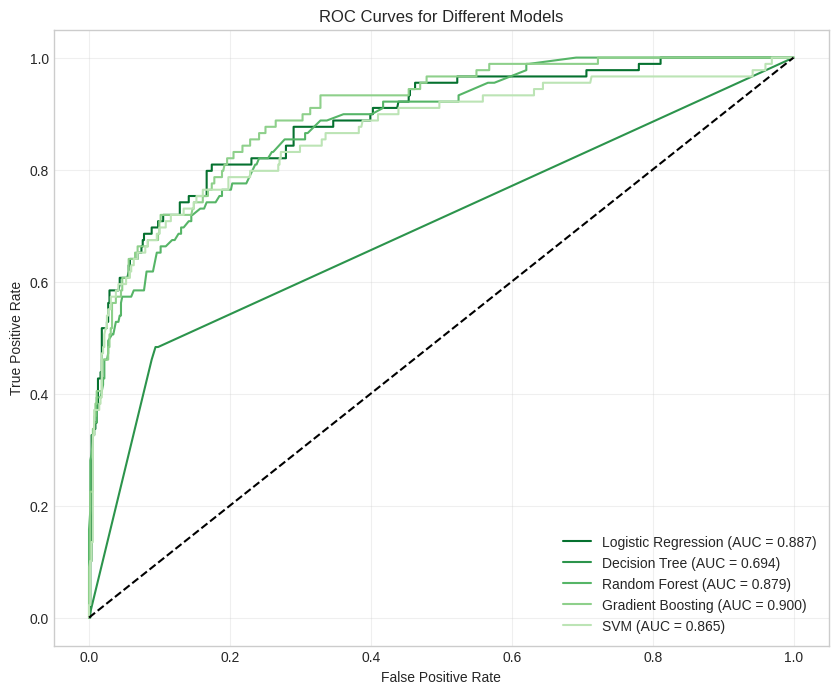

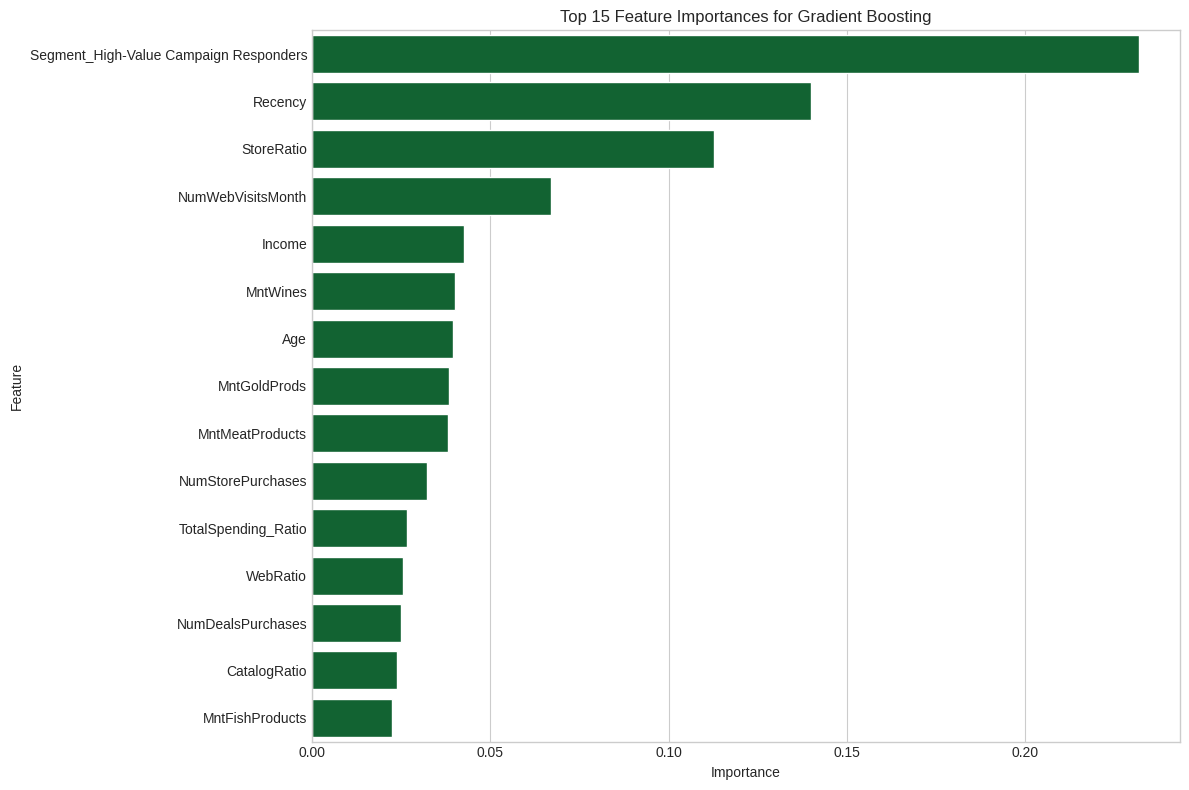


Top 10 Most Important Features:
                                   Feature  Importance
26  Segment_High-Value Campaign Responders    0.231753
19                                 Recency    0.139976
17                              StoreRatio    0.112705
14                       NumWebVisitsMonth    0.067046
1                                   Income    0.042728
4                                 MntWines    0.040036
0                                      Age    0.039470
9                             MntGoldProds    0.038370
6                          MntMeatProducts    0.038209
13                       NumStorePurchases    0.032160

Performing SHAP analysis on the best model: Gradient Boosting


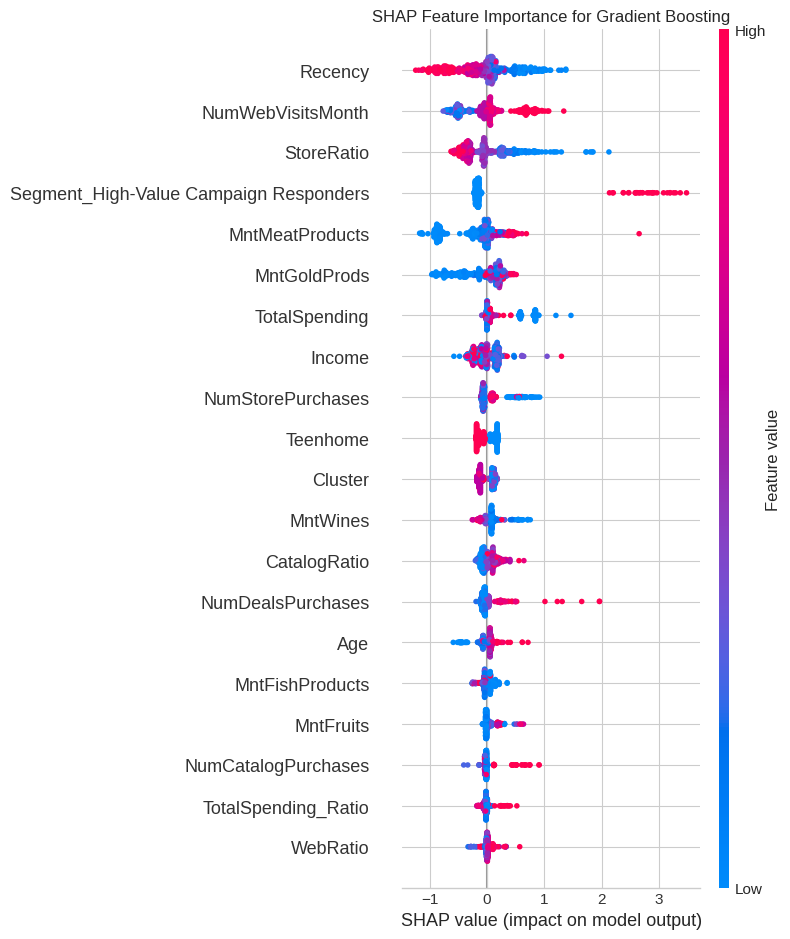

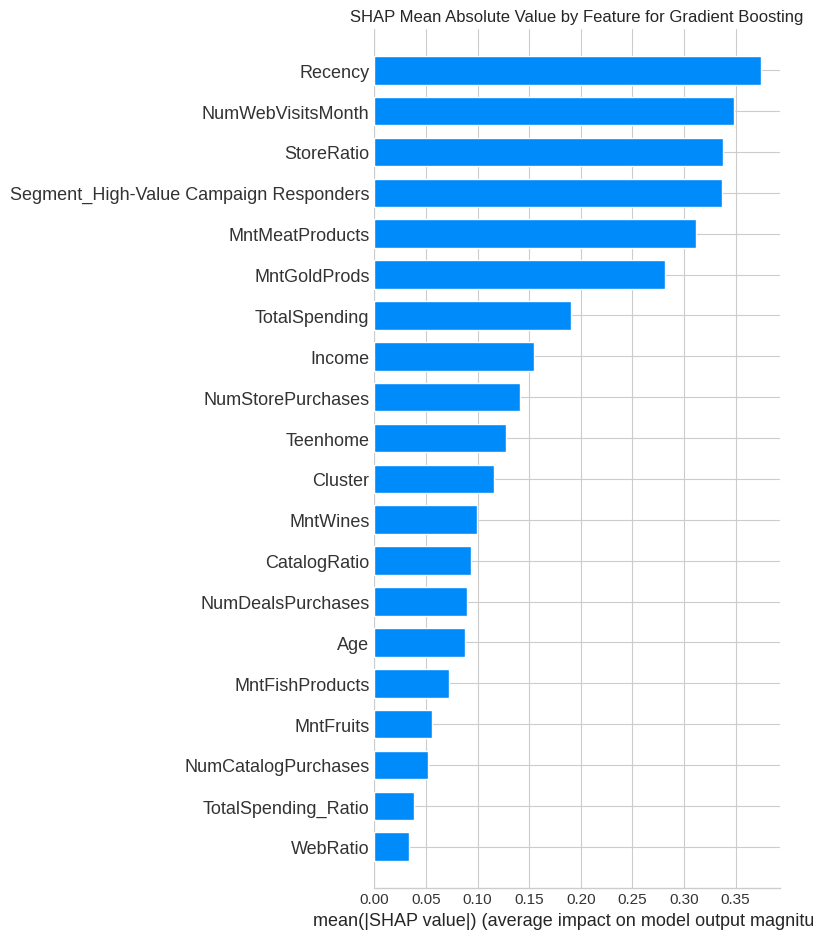


Top 10 Features by SHAP Importance:
                                   Feature  Importance
19                                 Recency    0.374293
14                       NumWebVisitsMonth    0.348757
17                              StoreRatio    0.337361
26  Segment_High-Value Campaign Responders    0.336913
6                          MntMeatProducts    0.311835
9                             MntGoldProds    0.281706
2                            TotalSpending    0.190799
1                                   Income    0.154981
13                       NumStorePurchases    0.141161
20                                Teenhome    0.127613


<Figure size 1000x600 with 0 Axes>

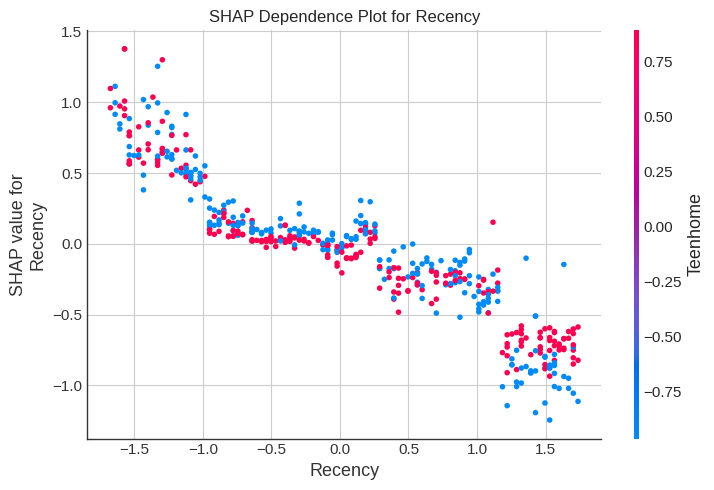

<Figure size 1000x600 with 0 Axes>

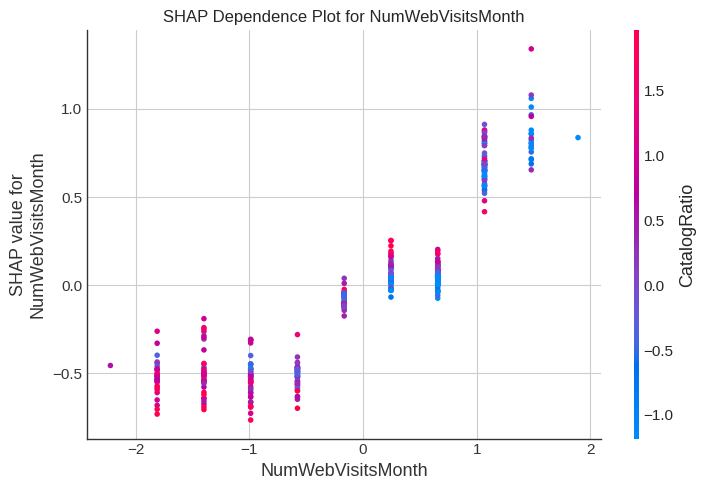

<Figure size 1000x600 with 0 Axes>

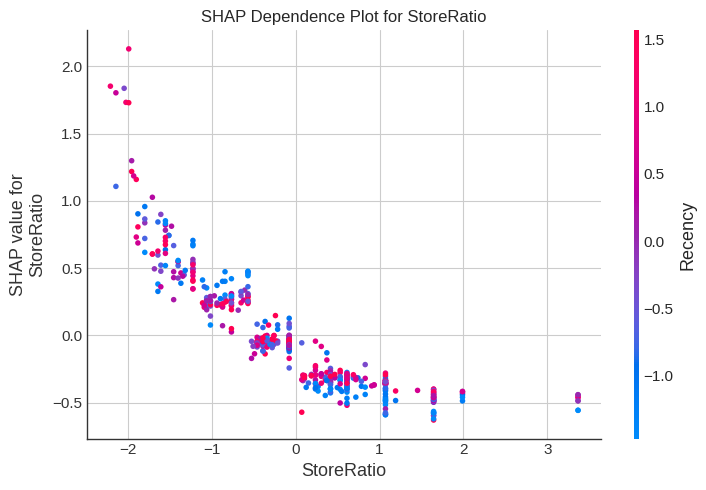


Example of Segment Targeting for a New Campaign:
(Using test data as an example for demonstration purposes)
        response_probability                          segment_name
                        mean count                                
Cluster                                                           
5.0                 0.708328    37  High-Value Campaign Responders
2.0                 0.177771   162   Budget-Conscious Web Shoppers
0.0                 0.169775    67       Affluent Wine Enthusiasts
1.0                 0.124734    97           Premium Empty Nesters
3.0                 0.046745   195         Low-Engagement Families
4.0                 0.035168    82      Disengaged Mature Shoppers

Recommended Segment Targeting Strategy:
Primary Target:     High-Value Campaign Responders
Name: 5.0, dtype: object - Expected Response Rate: 70.83% - Audience Size: 37
Primary Target:     Budget-Conscious Web Shoppers
Name: 2.0, dtype: object - Expected Response Rate: 17.78% - Audience

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.impute import SimpleImputer
import shap


# Define features to use in the model
# Based on your column list, selecting relevant features
features = [
    'Age', 'Income', 'TotalSpending', 'TotalSpending_Ratio',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth', 'WebRatio', 'CatalogRatio', 'StoreRatio',
    'Children', 'Recency', 'Teenhome', 'Kidhome', 'Cluster'
]

# Check which features are available in your dataframe
available_features = [f for f in features if f in df_clean_imputed.columns]
print("\nUsing these features:", available_features)

# One-hot encode the segment names
df_encoded = pd.get_dummies(df_clean_imputed, columns=['Segment'], drop_first=False)

# Update features list to include the one-hot encoded segment columns
segment_features = [col for col in df_encoded.columns if col.startswith('Segment_')]
X = df_encoded[available_features + segment_features]
y = df_encoded['Response']  # Target is the campaign response

# Check for missing values in the features
print("\nMissing values in selected features:")
print(X.isnull().sum().sum(), "total missing values")

# Impute missing values
print("\nImputing missing values...")
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Verify all missing values are handled
print("Missing values after imputation:", X_imputed.isnull().sum().sum())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the models to train
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# Create a dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")

    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc
    }

    # Print results
    print(f"{name} Results:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  ROC AUC: {roc_auc:.4f}")
    print(f"  Classification Report:\n{classification_report(y_test, y_pred)}")
    print("-" * 50)

# Create a comparison dataframe of results
comparison_df = pd.DataFrame({
    model_name: {
        'Accuracy': results[model_name]['accuracy'],
        'Precision': results[model_name]['precision'],
        'Recall': results[model_name]['recall'],
        'F1 Score': results[model_name]['f1'],
        'ROC AUC': results[model_name]['roc_auc']
    } for model_name in results.keys()
})

# Transpose for better readability
comparison_df = comparison_df.T.sort_values('ROC AUC', ascending=False)
print("Model Comparison:")
print(comparison_df)

# Find the best model based on ROC AUC (which is generally a good metric for imbalanced classes)
best_model_name = comparison_df.index[0]
best_model = results[best_model_name]['model']
print(f"\nBest model: {best_model_name} with ROC AUC: {results[best_model_name]['roc_auc']:.4f}")

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))
for name, result in results.items():
    model = result['model']
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.savefig('roc_curves_comparison.png')
plt.show()

# If the model supports feature importances directly, extract them
if hasattr(best_model, 'feature_importances_'):
    # For tree-based models
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
    plt.title(f'Top 15 Feature Importances for {best_model_name}')
    plt.tight_layout()
    plt.savefig('feature_importance.png')
    plt.show()

    print("\nTop 10 Most Important Features:")
    print(feature_importance.head(10))
elif best_model_name == "Logistic Regression":
    # For logistic regression
    coefficients = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': best_model.coef_[0]
    }).sort_values('Coefficient', ascending=False)

    # Plot coefficients
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Coefficient', y='Feature', data=coefficients.head(15))
    plt.title(f'Top 15 Coefficients for {best_model_name}')
    plt.tight_layout()
    plt.savefig('coefficients.png')
    plt.show()

    print("\nTop 10 Most Positive Coefficients:")
    print(coefficients.head(10))

# Perform SHAP analysis on the best model if not SVM (which can be very slow with SHAP)
if best_model_name != "SVM":
    print(f"\nPerforming SHAP analysis on the best model: {best_model_name}")
    try:
        # Feature importance analysis using SHAP
        if best_model_name == "Logistic Regression":
            explainer = shap.LinearExplainer(best_model, X_train_scaled)
        elif best_model_name in ["Decision Tree", "Random Forest", "Gradient Boosting"]:
            explainer = shap.TreeExplainer(best_model)

        # Calculate SHAP values (use a sample of test data if dataset is large)
        sample_size = min(500, X_test_scaled.shape[0])  # Limit to 500 samples for speed
        X_test_sample = X_test_scaled[:sample_size]

        shap_values = explainer.shap_values(X_test_sample)

        # If the model returns a list of shap values (for each class), take the ones for the positive class
        if isinstance(shap_values, list):
            shap_values = shap_values[1]  # Values for class 1 (responded)

        # Plot SHAP summary
        plt.figure(figsize=(12, 10))
        shap.summary_plot(shap_values, X_test_sample, feature_names=X.columns.tolist(), show=False)
        plt.title(f'SHAP Feature Importance for {best_model_name}')
        plt.tight_layout()
        plt.savefig('shap_summary.png')
        plt.show()

        # Plot SHAP summary bar plot (average magnitude)
        plt.figure(figsize=(12, 10))
        shap.summary_plot(shap_values, X_test_sample, feature_names=X.columns.tolist(), plot_type="bar", show=False)
        plt.title(f'SHAP Mean Absolute Value by Feature for {best_model_name}')
        plt.tight_layout()
        plt.savefig('shap_bar_plot.png')
        plt.show()

        # Identify top features based on SHAP values
        mean_shap = np.abs(shap_values).mean(0)
        feature_importance = pd.DataFrame({
            'Feature': X.columns,
            'Importance': mean_shap
        }).sort_values('Importance', ascending=False)

        print("\nTop 10 Features by SHAP Importance:")
        print(feature_importance.head(10))

        # Plot SHAP dependence plots for top 3 features
        top_features_idx = feature_importance.index[:3]
        for idx in top_features_idx:
            feature_name = X.columns[idx]
            plt.figure(figsize=(10, 6))
            shap.dependence_plot(idx, shap_values, X_test_sample, feature_names=X.columns.tolist(), show=False)
            plt.title(f'SHAP Dependence Plot for {feature_name}')
            plt.tight_layout()
            plt.savefig(f'shap_dependence_{feature_name}.png')
            plt.show()
    except Exception as e:
        print(f"Error in SHAP analysis: {e}")
        print("Continuing without SHAP analysis.")

# Function to predict response for a new campaign
def predict_campaign_response(campaign_data, model=best_model, scaler=scaler, imputer=imputer, segment_names=segment_names):
    """
    Predict response rates for a new campaign across different segments.

    Parameters:
    campaign_data: DataFrame with the same features as the training data
    model: The trained model to use for prediction
    scaler: The fitted scaler to transform the data
    imputer: The fitted imputer to handle missing values
    segment_names: Dictionary mapping cluster numbers to segment names

    Returns:
    DataFrame with predicted response probabilities by segment
    """
    # Handle missing values
    campaign_data_imputed = pd.DataFrame(imputer.transform(campaign_data), columns=campaign_data.columns)

    # Scale the data
    campaign_data_scaled = scaler.transform(campaign_data_imputed)

    # Get prediction probabilities
    response_probs = model.predict_proba(campaign_data_scaled)[:, 1]

    # Add predictions to the data
    campaign_data_with_pred = campaign_data.copy()
    campaign_data_with_pred['response_probability'] = response_probs

    # Group by segment and calculate average response probability
    segment_predictions = campaign_data_with_pred.groupby('Cluster').agg({
        'response_probability': ['mean', 'count']
    })

    # Add segment names
    segment_predictions['segment_name'] = segment_predictions.index.map(segment_names)

    return segment_predictions

print("\nExample of Segment Targeting for a New Campaign:")
print("(Using test data as an example for demonstration purposes)")

# Using the test data as an example for the prediction function
X_test_original = X_test.copy()  # Get a copy before scaling
segment_predictions = predict_campaign_response(X_test_original)

# Sort segments by predicted response probability
sorted_segments = segment_predictions.sort_values(('response_probability', 'mean'), ascending=False)
print(sorted_segments)

print("\nRecommended Segment Targeting Strategy:")
for i, (cluster, row) in enumerate(sorted_segments.iterrows()):
    segment = row['segment_name']
    prob = row[('response_probability', 'mean')]
    count = row[('response_probability', 'count')]

    if i < 2:  # Top 2 segments
        print(f"Primary Target: {segment} - Expected Response Rate: {prob:.2%} - Audience Size: {count:.0f}")
    elif i < 4:  # Next 2 segments
        print(f"Secondary Target: {segment} - Expected Response Rate: {prob:.2%} - Audience Size: {count:.0f}")
    else:
        print(f"Low Priority: {segment} - Expected Response Rate: {prob:.2%} - Audience Size: {count:.0f}")

print("\nMarketing Campaign Recommendation Tool:")
print("----------------------------------------")
print("You can use the 'predict_campaign_response' function to evaluate future campaigns.")
print("For a new campaign, prepare a dataset with the same features and run the function to get segment-specific predictions.")

In [ ]:
df_clean_imputed.to_csv('clean_imputed_data.csv', index=False)

Generating Trendstyle Outfitters Customer Segment Campaign Analysis...

==== CAMPAIGN RESPONSE ANALYSIS BY SEGMENT ====
                                Segment  Seasonal Collection Launch (%)  \
2          Fashion-Forward Young Adults                       49.772727   
5         Trend-Conscious Professionals                       51.507841   
3            Luxury Fashion Enthusiasts                       26.758410   
0  Budget-Conscious Essentials Shoppers                       11.479592   
4       Occasional Statement Purchasers                       16.406250   
1         Classic Style Traditionalists                        3.770197   

   Exclusive Preview Events (%)  Flash Sales & Limited Editions (%)  \
2                     35.681818                           62.727273   
5                     37.153197                           37.394451   
3                     46.636086                           15.902141   
0                      6.887755                           29.846939   

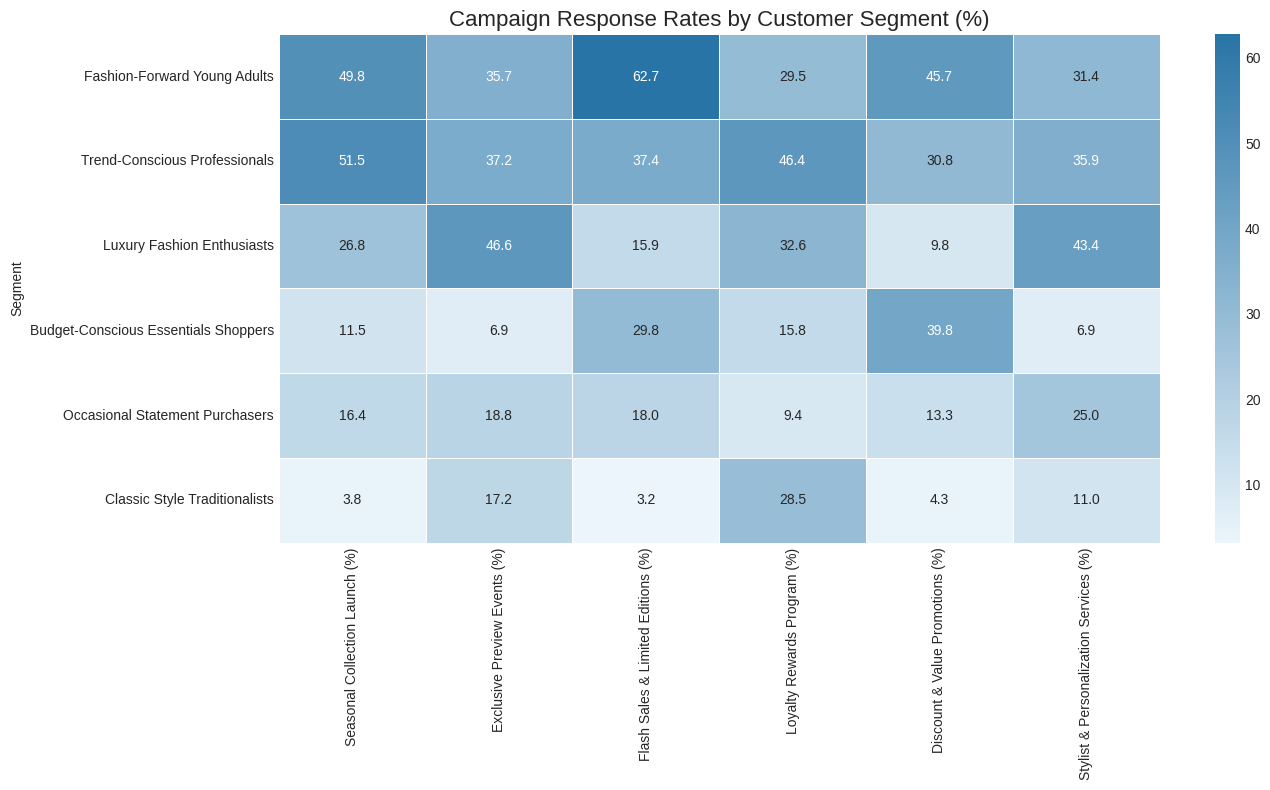

In [ ]:
# Trendstyle Outfitters: Campaign Response Analysis by Customer Segment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Since we don't have actual data, we'll create a realistic synthetic dataset
# based on industry patterns and the segment descriptions provided

def create_fashion_retail_dataset(n_customers=1000):
    """
    Create a synthetic dataset for Trendstyle Outfitters based on the segment descriptions
    """
    # Define segment distributions according to provided percentages
    segment_probs = {
        'Luxury Fashion Enthusiasts': 0.22,
        'Trend-Conscious Professionals': 0.29,
        'Classic Style Traditionalists': 0.18,
        'Fashion-Forward Young Adults': 0.15,
        'Budget-Conscious Essentials Shoppers': 0.12,
        'Occasional Statement Purchasers': 0.04
    }

    segments = np.random.choice(
        list(segment_probs.keys()),
        size=n_customers,
        p=list(segment_probs.values())
    )

    # Initialize the dataframe
    df = pd.DataFrame({
        'CustomerID': range(1, n_customers + 1),
        'Segment': segments
    })

    # Age distribution by segment (realistic ranges based on descriptions)
    age_ranges = {
        'Luxury Fashion Enthusiasts': (35, 55),
        'Trend-Conscious Professionals': (25, 45),
        'Classic Style Traditionalists': (50, 75),
        'Fashion-Forward Young Adults': (18, 30),
        'Budget-Conscious Essentials Shoppers': (20, 65),
        'Occasional Statement Purchasers': (25, 60)
    }

    # Income distribution by segment (in thousands)
    income_ranges = {
        'Luxury Fashion Enthusiasts': (120, 250),
        'Trend-Conscious Professionals': (70, 120),
        'Classic Style Traditionalists': (80, 150),
        'Fashion-Forward Young Adults': (30, 80),
        'Budget-Conscious Essentials Shoppers': (25, 70),
        'Occasional Statement Purchasers': (40, 130)
    }

    # Digital engagement scores by segment (1-10 scale)
    digital_engagement_ranges = {
        'Luxury Fashion Enthusiasts': (5, 8),
        'Trend-Conscious Professionals': (7, 10),
        'Classic Style Traditionalists': (2, 5),
        'Fashion-Forward Young Adults': (8, 10),
        'Budget-Conscious Essentials Shoppers': (4, 7),
        'Occasional Statement Purchasers': (3, 7)
    }

    # Purchase frequency (annual) by segment
    purchase_freq_ranges = {
        'Luxury Fashion Enthusiasts': (4, 8),
        'Trend-Conscious Professionals': (6, 12),
        'Classic Style Traditionalists': (3, 6),
        'Fashion-Forward Young Adults': (8, 15),
        'Budget-Conscious Essentials Shoppers': (4, 8),
        'Occasional Statement Purchasers': (1, 3)
    }

    # Average order value by segment
    aov_ranges = {
        'Luxury Fashion Enthusiasts': (400, 1200),
        'Trend-Conscious Professionals': (150, 400),
        'Classic Style Traditionalists': (200, 500),
        'Fashion-Forward Young Adults': (50, 200),
        'Budget-Conscious Essentials Shoppers': (30, 100),
        'Occasional Statement Purchasers': (200, 600)
    }

    # Define campaign response characteristics based on segment descriptions
    # We'll create 6 different campaign types typical for fashion retail

    # Campaign types:
    # 1. Seasonal Collection Launch (appeals to trend-conscious and fashion-forward)
    # 2. Exclusive Preview Events (appeals to luxury and classic)
    # 3. Flash Sales & Limited Editions (appeals to young adults and budget)
    # 4. Loyalty Rewards Program (appeals to classic and trend-conscious)
    # 5. Discount & Value Promotions (appeals to budget and occasional)
    # 6. Stylist & Personalization Campaign (appeals to luxury and occasional)

    # Base response rates by segment and campaign type (realistic for retail)
    base_response_rates = {
        'Luxury Fashion Enthusiasts': {
            'SeasonalLaunch': 0.18,
            'ExclusivePreview': 0.40,
            'FlashSale': 0.10,
            'LoyaltyRewards': 0.25,
            'ValuePromotion': 0.05,
            'StylistService': 0.35
        },
        'Trend-Conscious Professionals': {
            'SeasonalLaunch': 0.35,
            'ExclusivePreview': 0.20,
            'FlashSale': 0.22,
            'LoyaltyRewards': 0.30,
            'ValuePromotion': 0.15,
            'StylistService': 0.18
        },
        'Classic Style Traditionalists': {
            'SeasonalLaunch': 0.12,
            'ExclusivePreview': 0.25,
            'FlashSale': 0.08,
            'LoyaltyRewards': 0.38,
            'ValuePromotion': 0.10,
            'StylistService': 0.20
        },
        'Fashion-Forward Young Adults': {
            'SeasonalLaunch': 0.30,
            'ExclusivePreview': 0.10,
            'FlashSale': 0.45,
            'LoyaltyRewards': 0.12,
            'ValuePromotion': 0.25,
            'StylistService': 0.08
        },
        'Budget-Conscious Essentials Shoppers': {
            'SeasonalLaunch': 0.08,
            'ExclusivePreview': 0.03,
            'FlashSale': 0.32,
            'LoyaltyRewards': 0.15,
            'ValuePromotion': 0.40,
            'StylistService': 0.04
        },
        'Occasional Statement Purchasers': {
            'SeasonalLaunch': 0.15,
            'ExclusivePreview': 0.18,
            'FlashSale': 0.20,
            'LoyaltyRewards': 0.08,
            'ValuePromotion': 0.15,
            'StylistService': 0.22
        }
    }

    # Generate individual customer attributes based on their segment
    ages = []
    incomes = []
    digital_scores = []
    purchase_freqs = []
    aovs = []

    for segment in df['Segment']:
        age_min, age_max = age_ranges[segment]
        ages.append(np.random.randint(age_min, age_max + 1))

        income_min, income_max = income_ranges[segment]
        incomes.append(np.random.randint(income_min, income_max + 1))

        digital_min, digital_max = digital_engagement_ranges[segment]
        digital_scores.append(round(np.random.uniform(digital_min, digital_max), 1))

        freq_min, freq_max = purchase_freq_ranges[segment]
        purchase_freqs.append(np.random.randint(freq_min, freq_max + 1))

        aov_min, aov_max = aov_ranges[segment]
        aovs.append(round(np.random.uniform(aov_min, aov_max), 2))

    df['Age'] = ages
    df['AnnualIncome'] = incomes
    df['DigitalEngagementScore'] = digital_scores
    df['PurchaseFrequency'] = purchase_freqs
    df['AverageOrderValue'] = aovs

    # Calculate annual spend
    df['AnnualSpend'] = df['PurchaseFrequency'] * df['AverageOrderValue']

    # Channel preference (higher digital score = higher online preference)
    df['OnlineChannelPreference'] = df['DigitalEngagementScore'] / 10
    df['StoreChannelPreference'] = 1 - (df['DigitalEngagementScore'] / 10)

    # Generate campaign responses based on segment propensities
    # Add some randomization to make it realistic

    campaigns = ['SeasonalLaunch', 'ExclusivePreview', 'FlashSale',
                'LoyaltyRewards', 'ValuePromotion', 'StylistService']

    for campaign in campaigns:
        responses = []

        for i, segment in enumerate(df['Segment']):
            base_rate = base_response_rates[segment][campaign]

            # Add individual variation based on their engagement score
            # Higher digital engagement generally means higher response likelihood
            # but with diminishing returns for campaigns that are less segment-targeted
            adjustment = (df.loc[i, 'DigitalEngagementScore'] - 5) / 20

            # Calculate final response probability
            response_prob = base_rate + adjustment

            # Ensure probability stays between 0 and 1
            response_prob = max(0.01, min(0.95, response_prob))

            # Generate binary response (0 or 1)
            response = 1 if np.random.random() < response_prob else 0
            responses.append(response)

        df[f'Responded_{campaign}'] = responses

    # Add customer tenure
    df['CustomerTenureYears'] = np.random.uniform(0.5, 10, size=n_customers)

    # Add lifetime value (function of tenure and annual spend with some variation)
    df['CustomerLifetimeValue'] = df['CustomerTenureYears'] * df['AnnualSpend'] * \
                                   np.random.uniform(0.8, 1.2, size=n_customers)

    return df

# Analysis function for campaign response rates by segment
def analyze_campaign_response(df):
    """Analyze campaign response rates for each customer segment"""

    # Get campaign columns
    campaign_cols = [col for col in df.columns if col.startswith('Responded_')]

    # Calculate response rates by segment
    segment_response = df.groupby('Segment')[campaign_cols].mean().reset_index()

    # Add total engagement column (sum of all campaign responses)
    segment_response['TotalResponseRate'] = segment_response[campaign_cols].sum(axis=1)

    # Convert to percentages
    for col in campaign_cols + ['TotalResponseRate']:
        segment_response[col] = segment_response[col] * 100

    # Rename columns for clarity
    segment_response = segment_response.rename(columns={
        'Responded_SeasonalLaunch': 'Seasonal Collection Launch (%)',
        'Responded_ExclusivePreview': 'Exclusive Preview Events (%)',
        'Responded_FlashSale': 'Flash Sales & Limited Editions (%)',
        'Responded_LoyaltyRewards': 'Loyalty Rewards Program (%)',
        'Responded_ValuePromotion': 'Discount & Value Promotions (%)',
        'Responded_StylistService': 'Stylist & Personalization Services (%)'
    })

    # Sort by total engagement
    segment_response = segment_response.sort_values('TotalResponseRate', ascending=False)

    return segment_response

# Segment profile analysis
def analyze_segment_profiles(df):
    """Generate detailed profiles of each customer segment"""

    # Calculate key metrics by segment
    segment_profiles = df.groupby('Segment').agg({
        'Age': 'mean',
        'AnnualIncome': 'mean',
        'DigitalEngagementScore': 'mean',
        'PurchaseFrequency': 'mean',
        'AverageOrderValue': 'mean',
        'AnnualSpend': 'mean',
        'OnlineChannelPreference': 'mean',
        'StoreChannelPreference': 'mean',
        'CustomerTenureYears': 'mean',
        'CustomerLifetimeValue': 'mean'
    }).reset_index()

    # Round for clarity
    numeric_cols = segment_profiles.columns.drop('Segment')
    segment_profiles[numeric_cols] = segment_profiles[numeric_cols].round(2)

    return segment_profiles

# Campaign effectiveness analysis
def analyze_campaign_effectiveness(df):
    """Analyze which campaigns are most effective for each segment"""

    campaign_cols = [col for col in df.columns if col.startswith('Responded_')]
    campaign_names = {
        'Responded_SeasonalLaunch': 'Seasonal Collection Launch',
        'Responded_ExclusivePreview': 'Exclusive Preview Events',
        'Responded_FlashSale': 'Flash Sales & Limited Editions',
        'Responded_LoyaltyRewards': 'Loyalty Rewards Program',
        'Responded_ValuePromotion': 'Discount & Value Promotions',
        'Responded_StylistService': 'Stylist & Personalization Services'
    }

    # For each segment, identify best and worst campaigns
    segment_campaign_insights = []

    for segment in df['Segment'].unique():
        segment_data = df[df['Segment'] == segment]

        # Calculate response rates for each campaign
        response_rates = {}
        for col in campaign_cols:
            response_rates[col] = segment_data[col].mean() * 100

        # Find best and worst campaigns
        best_campaign = max(response_rates, key=response_rates.get)
        worst_campaign = min(response_rates, key=response_rates.get)

        # Calculate average spend for responders vs. non-responders
        responder_spend = {}
        non_responder_spend = {}

        for col in campaign_cols:
            responders = segment_data[segment_data[col] == 1]
            non_responders = segment_data[segment_data[col] == 0]

            if len(responders) > 0:
                responder_spend[col] = responders['AnnualSpend'].mean()
            else:
                responder_spend[col] = 0

            if len(non_responders) > 0:
                non_responder_spend[col] = non_responders['AnnualSpend'].mean()
            else:
                non_responder_spend[col] = 0

        # ROI calculation (simplified)
        roi_multiplier = {}
        for col in campaign_cols:
            if non_responder_spend[col] > 0:
                roi_multiplier[col] = responder_spend[col] / non_responder_spend[col]
            else:
                roi_multiplier[col] = 1.0

        best_roi_campaign = max(roi_multiplier, key=roi_multiplier.get)

        # Average response rate across all campaigns
        avg_response = sum(response_rates.values()) / len(response_rates)

        # Digital vs. Store channel effectiveness
        digital_score = segment_data['DigitalEngagementScore'].mean()
        online_pref = segment_data['OnlineChannelPreference'].mean()

        preferred_channel = "Online" if online_pref > 0.5 else "In-store"

        segment_campaign_insights.append({
            'Segment': segment,
            'AvgResponseRate': avg_response,
            'BestCampaign': campaign_names[best_campaign],
            'BestCampaignRate': response_rates[best_campaign],
            'WorstCampaign': campaign_names[worst_campaign],
            'WorstCampaignRate': response_rates[worst_campaign],
            'BestROICampaign': campaign_names[best_roi_campaign],
            'BestROIMultiplier': roi_multiplier[best_roi_campaign],
            'PreferredChannel': preferred_channel,
            'DigitalEngagement': digital_score
        })

    insights_df = pd.DataFrame(segment_campaign_insights)
    insights_df = insights_df.sort_values('AvgResponseRate', ascending=False)

    # Round for clarity
    numeric_cols = ['AvgResponseRate', 'BestCampaignRate', 'WorstCampaignRate', 'BestROIMultiplier', 'DigitalEngagement']
    insights_df[numeric_cols] = insights_df[numeric_cols].round(2)

    return insights_df

# Campaign heatmap visualization
def visualize_campaign_heatmap(response_data):
    """Create a heatmap of campaign response rates by segment"""

    # Prepare data for heatmap
    campaign_cols = [col for col in response_data.columns
                    if col not in ['Segment', 'TotalResponseRate']]

    # Set up the figure
    plt.figure(figsize=(14, 8))

    # Create custom colormap from light to dark blue
    cmap = LinearSegmentedColormap.from_list('blue_gradient', ['#EBF5FB', '#2874A6'])

    # Create heatmap
    ax = sns.heatmap(response_data.set_index('Segment')[campaign_cols],
                    annot=True, fmt='.1f', cmap=cmap, linewidths=0.5)

    plt.title('Campaign Response Rates by Customer Segment (%)', fontsize=16)
    plt.tight_layout()

    return ax

# Segment targeting recommendations
def generate_targeting_recommendations(campaign_insights, segment_profiles):
    """Generate segment-specific targeting recommendations"""

    recommendations = []

    for _, row in campaign_insights.iterrows():
        segment = row['Segment']
        profile = segment_profiles[segment_profiles['Segment'] == segment].iloc[0]

        # Determine preferred channel mix based on preferences
        online_pref = profile['OnlineChannelPreference']
        channel_mix = f"Online: {int(online_pref * 100)}%, In-store: {int((1-online_pref) * 100)}%"

        # Determine primary messaging based on segment characteristics
        if segment == 'Luxury Fashion Enthusiasts':
            primary_messaging = "Exclusivity, quality, and personalized service"
            secondary_campaigns = "Stylist services, VIP previews"

        elif segment == 'Trend-Conscious Professionals':
            primary_messaging = "Latest trends, versatile professional styles"
            secondary_campaigns = "Seasonal launches, style guides"

        elif segment == 'Classic Style Traditionalists':
            primary_messaging = "Timeless quality, heritage, and craftsmanship"
            secondary_campaigns = "Loyalty rewards, classic collections"

        elif segment == 'Fashion-Forward Young Adults':
            primary_messaging = "Cutting-edge trends, social media relevance"
            secondary_campaigns = "Flash sales, influencer collaborations"

        elif segment == 'Budget-Conscious Essentials Shoppers':
            primary_messaging = "Value, durability, and smart essentials"
            secondary_campaigns = "Discount promotions, bundle offers"

        else:  # Occasional Statement Purchasers
            primary_messaging = "Statement pieces, special occasions"
            secondary_campaigns = "Seasonal events, curated collections"

        # Best day/time based on digital engagement (simplified assumption)
        if profile['DigitalEngagementScore'] > 7:
            best_timing = "Weekday evenings, weekend afternoons"
        elif profile['DigitalEngagementScore'] > 5:
            best_timing = "Weekend mornings, weekday lunch hours"
        else:
            best_timing = "Weekend afternoons, traditional retail hours"

        # Calculate expected response uplift from targeting optimization
        current_response = row['AvgResponseRate']
        potential_response = min(current_response * 1.35, 70.0)  # Realistic cap at 70%
        expected_uplift = potential_response - current_response

        recommendations.append({
            'Segment': segment,
            'PrimaryChannelMix': channel_mix,
            'PrimaryMessaging': primary_messaging,
            'BestPerformingCampaign': row['BestCampaign'],
            'RecommendedSecondaryCampaigns': secondary_campaigns,
            'OptimalTimingPatterns': best_timing,
            'CurrentAvgResponse': current_response,
            'PotentialOptimizedResponse': potential_response,
            'ExpectedResponseUplift': expected_uplift
        })

    recommendations_df = pd.DataFrame(recommendations)

    # Round numeric columns
    numeric_cols = ['CurrentAvgResponse', 'PotentialOptimizedResponse', 'ExpectedResponseUplift']
    recommendations_df[numeric_cols] = recommendations_df[numeric_cols].round(2)

    return recommendations_df

# Generate comprehensive analysis report
def run_complete_analysis(n_customers=2000):
    """Run complete analysis pipeline and generate comprehensive report"""

    print("Generating Trendstyle Outfitters Customer Segment Campaign Analysis...")
    df = create_fashion_retail_dataset(n_customers)

    print("\n==== CAMPAIGN RESPONSE ANALYSIS BY SEGMENT ====")
    response_data = analyze_campaign_response(df)
    print(response_data)

    print("\n==== CUSTOMER SEGMENT PROFILES ====")
    segment_profiles = analyze_segment_profiles(df)
    print(segment_profiles)

    print("\n==== CAMPAIGN EFFECTIVENESS BY SEGMENT ====")
    campaign_insights = analyze_campaign_effectiveness(df)
    print(campaign_insights)

    print("\n==== SEGMENT TARGETING RECOMMENDATIONS ====")
    targeting_recommendations = generate_targeting_recommendations(campaign_insights, segment_profiles)
    print(targeting_recommendations)

    # Create visualizations
    visualize_campaign_heatmap(response_data)

    return {
        'data': df,
        'response_analysis': response_data,
        'segment_profiles': segment_profiles,
        'campaign_insights': campaign_insights,
        'targeting_recommendations': targeting_recommendations
    }

# Run the analysis
results = run_complete_analysis(3000)

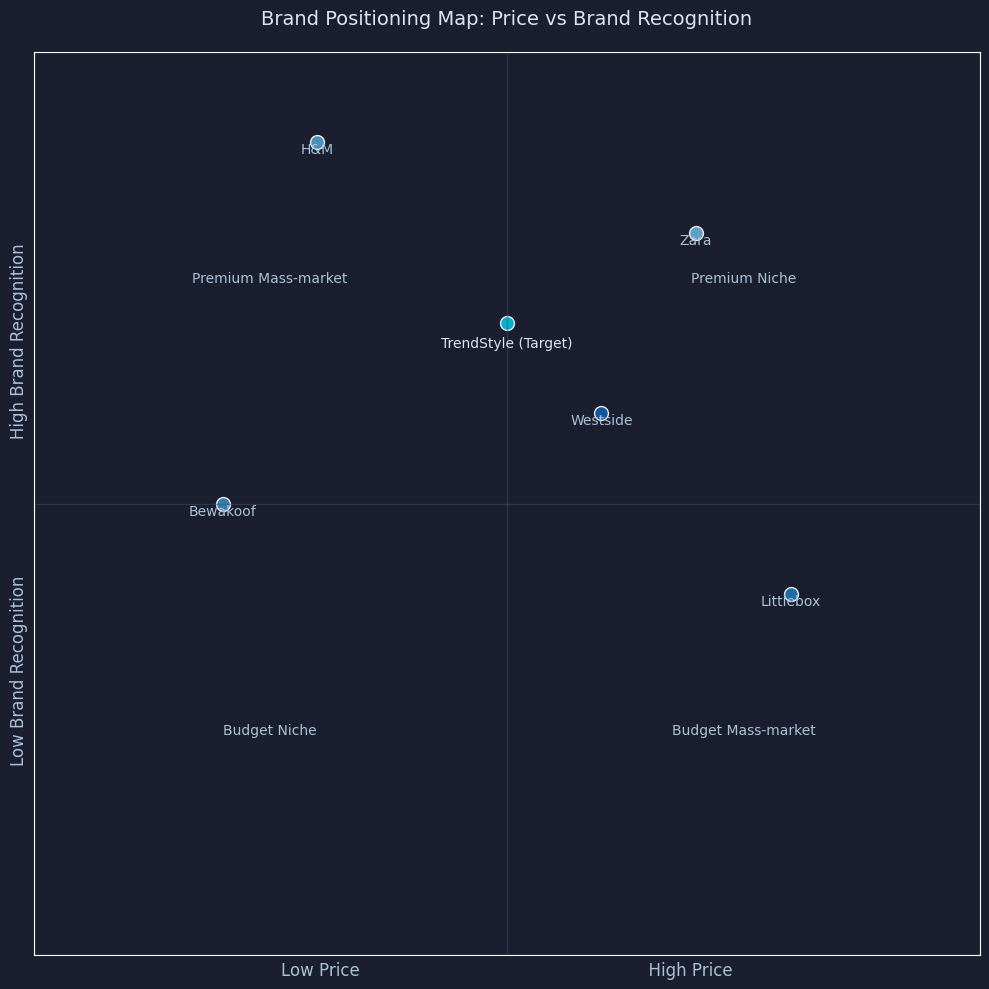

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set the style for the plot
plt.style.use('dark_background')

# Define brand data: [price, brand_recognition]
brands = {
    'Zara': [0.7, 0.8],
    'H&M': [0.3, 0.9],
    'Bewakoof': [0.2, 0.5],
    'Littlebox': [0.8, 0.4],
    'Westside': [0.6, 0.6],
    'TrendStyle (Target)': [0.5, 0.7]
}

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# Set background color
fig.patch.set_facecolor('#1a1e2e')
ax.set_facecolor('#1a1e2e')

# Configure axes
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel('Low Price                                                       High Price', fontsize=12, color='#a9c1d9')
ax.set_ylabel('Low Brand Recognition                          High Brand Recognition', fontsize=12, color='#a9c1d9', rotation=90)

# Hide the tick marks but keep the grid
ax.tick_params(axis='both', which='both', length=0, labelcolor='#a9c1d9')
ax.set_xticks([])
ax.set_yticks([])

# Create the quadrants
ax.axhline(y=0.5, color='#3a506b', linestyle='-', alpha=0.5, linewidth=1)
ax.axvline(x=0.5, color='#3a506b', linestyle='-', alpha=0.5, linewidth=1)

# Add quadrant labels
ax.text(0.25, 0.75, 'Premium Mass-market', ha='center', va='center', color='#a9c1d9', fontsize=10)
ax.text(0.75, 0.75, 'Premium Niche', ha='center', va='center', color='#a9c1d9', fontsize=10)
ax.text(0.25, 0.25, 'Budget Niche', ha='center', va='center', color='#a9c1d9', fontsize=10)
ax.text(0.75, 0.25, 'Budget Mass-market', ha='center', va='center', color='#a9c1d9', fontsize=10)

# Draw the frame around the quadrants
rect = plt.Rectangle((0, 0), 1, 1, fill=False, edgecolor='#3a506b', linewidth=1, alpha=0.7)
ax.add_patch(rect)

# Plot each brand with different blue hues
blue_cmap = plt.cm.Blues(np.linspace(0.5, 0.9, len(brands)))
colors = dict(zip(brands.keys(), blue_cmap))

# Special color for TrendStyle
colors['TrendStyle (Target)'] = '#00c2de'  # Bright cyan for emphasis

# Add points and labels for each brand
for i, (brand, [x, y]) in enumerate(brands.items()):
    ax.scatter(x, y, s=100, color=colors[brand], edgecolor='white', alpha=0.9)

    # Add a slight offset to the text for better readability
    text_y_offset = 0.03 if brand == 'TrendStyle (Target)' else 0

    ax.text(x, y - text_y_offset, brand,
            ha='center', va='bottom' if text_y_offset else 'top',
            color='#d9e5f1' if brand == 'TrendStyle (Target)' else '#a9c1d9',
            fontsize=10)

# Add title
plt.title('Brand Positioning Map: Price vs Brand Recognition', fontsize=14, color='#d9e5f1', pad=20)

# Add a subtle grid
ax.grid(True, linestyle='--', alpha=0.2, color='#3a506b')

# Adjust layout
plt.tight_layout()

# Add a blue ocean gradient background within the plot area
bg = plt.Rectangle((0, 0), 1, 1, fill=True,
                   color='#1a1e2e',
                   alpha=0.7,
                   transform=ax.transAxes,
                   zorder=-1)
ax.add_patch(bg)

# Save the figure
plt.savefig('brand_positioning_blue_ocean.png', dpi=300, bbox_inches='tight', facecolor=fig.get_facecolor())

# Show the plot
plt.show()